We see that our dataset is mad of $n=62$ and $p=13$. These are its main features of subset of plot

Let's also plot the histogram of box  in order to check normality and the boxplot, otherwise let's apply a log transformation.
It easy to see that is better consider a log-tranformation. So I will refer to box variable as log(box) in the following analysis.

[1] "X"                "best.lambda"      "cv.lasso"         "cv.ridge"        
 [5] "id.zero"          "m.backward"       "m.forward"        "m.gam"           
 [9] "m.glm"            "m.lasso"          "m.lasso.min"      "m.pcr"           
[13] "m.ridge"          "m.ridge.min"      "m.seqrep"         "max.adjr2"       
[17] "max.rsq"          "min.bic"          "min.rss"          "model.bic"       
[21] "model.mydata"     "model.mydata2"    "model.mydata3"    "model.mydata4"   
[25] "movie"            "mse"              "mydata"           "nonzero"         
[29] "p.mglm"           "prediction.lasso" "prediction.ridge" "rmse"            
[33] "sum"              "x1.cv"            "x2"               "x2.cv"           
[37] "y"                "y2"

[1] "box"       "mprating"  "budget"    "starpower" "sequel"    "action"   
 [7] "comedy"    "animated"  "horror"    "addict"    "cmngsoon"  "fandango" 
[13] "cntwait"

[1] 62

[1] 13

box      budget animated cmngsoon
1 19167085  28.0  FALSE    10      
2 63106589 150.0  TRUE     59      
3  5401605  37.4  FALSE    24

      box               budget        animated     cmngsoon     
 Min.   :  511920   Min.   :  5.00   FALSE:56   Min.   :  2.00  
 1st Qu.: 6956492   1st Qu.: 30.50   TRUE : 6   1st Qu.: 19.25  
 Median :16930926   Median : 37.40              Median : 36.50  
 Mean   :20720651   Mean   : 53.29              Mean   : 78.21  
 3rd Qu.:26696144   3rd Qu.: 60.00              3rd Qu.: 66.00  
 Max.   :70950500   Max.   :200.00              Max.   :594.00  

[1] 0

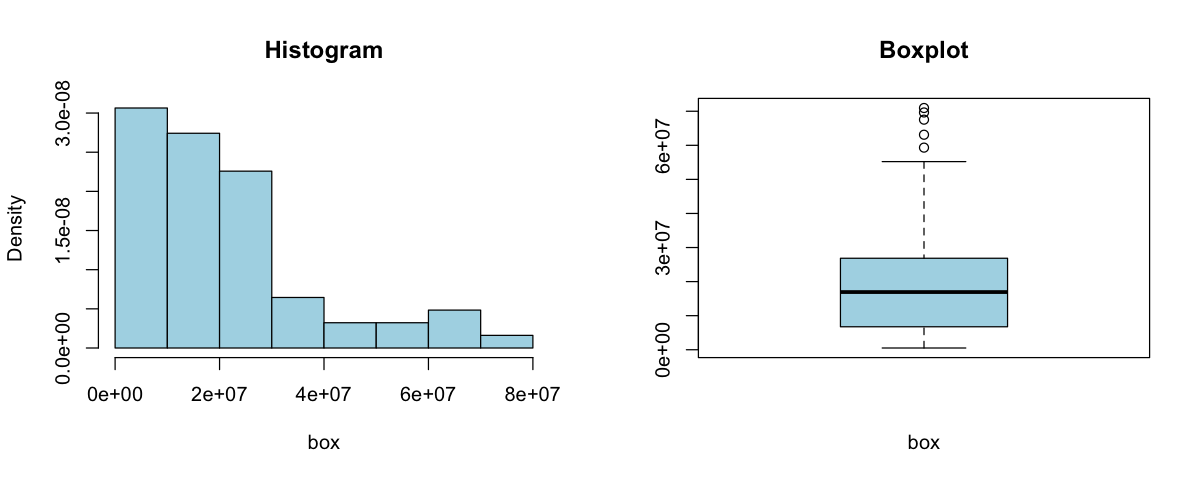

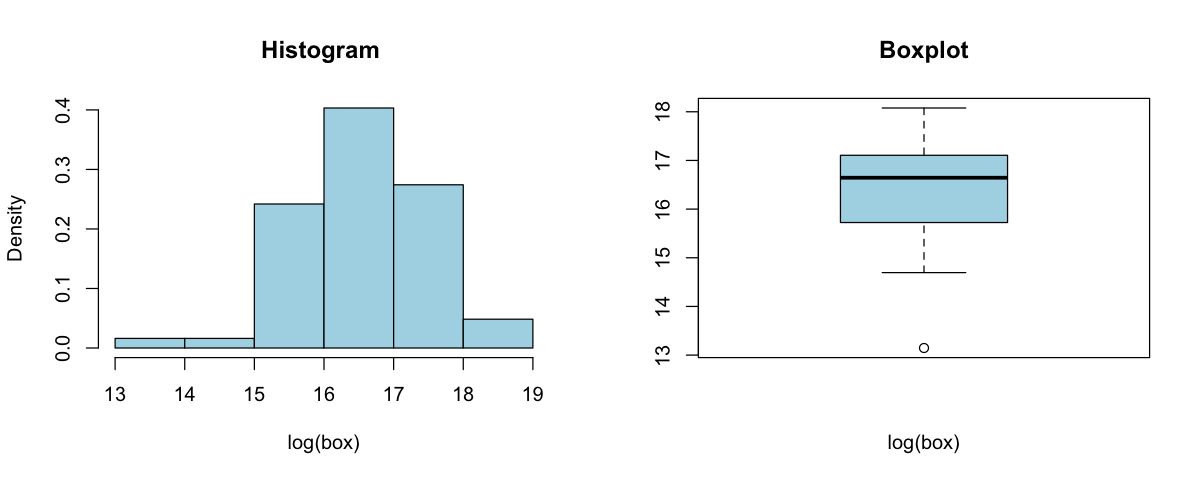

In [133]:
## load the data

load("movie.RData")
ls()
names(movie)
mydata<-movie
nrow(mydata)
ncol(mydata)

mydata <- mydata[, c('box', 'budget', 'animated',  'cmngsoon')]
mydata[1:3,]

summary(mydata)
#check NA values
sum(is.na(mydata))
#clean from NA
#mydata <- na.omit(mydata)


#to remove infinite
#which(mydata$felice=="-Inf")
#mydata<-mydata[-129,]
#check that they are factors otherwise make it

mydata$animated<-as.factor(mydata$animated)
## SE HAI VARIABILI QUALITATIVE CON DEI LIVELLI PLOTTA LA TABELLA 

par(mfrow=c(1,2))
options(repr.plot.width = 10, repr.plot.height = 4)
hist(mydata$box, prob=TRUE, xlab='box', main='Histogram',col="lightblue")
boxplot(mydata$box, xlab='box', main='Boxplot',col="lightblue" )
hist(log(mydata$box), prob=TRUE, xlab='log(box)', main='Histogram ',col="lightblue")
boxplot(log(mydata$box), xlab='log(box)', main='Boxplot',col="lightblue" )

mydata$box<-log((mydata$box))

 Let also check the relationship between Y and the covariates X. From the first plot we can see a kind of linear relationship (even if it is not so clear and evident) between box and budget.


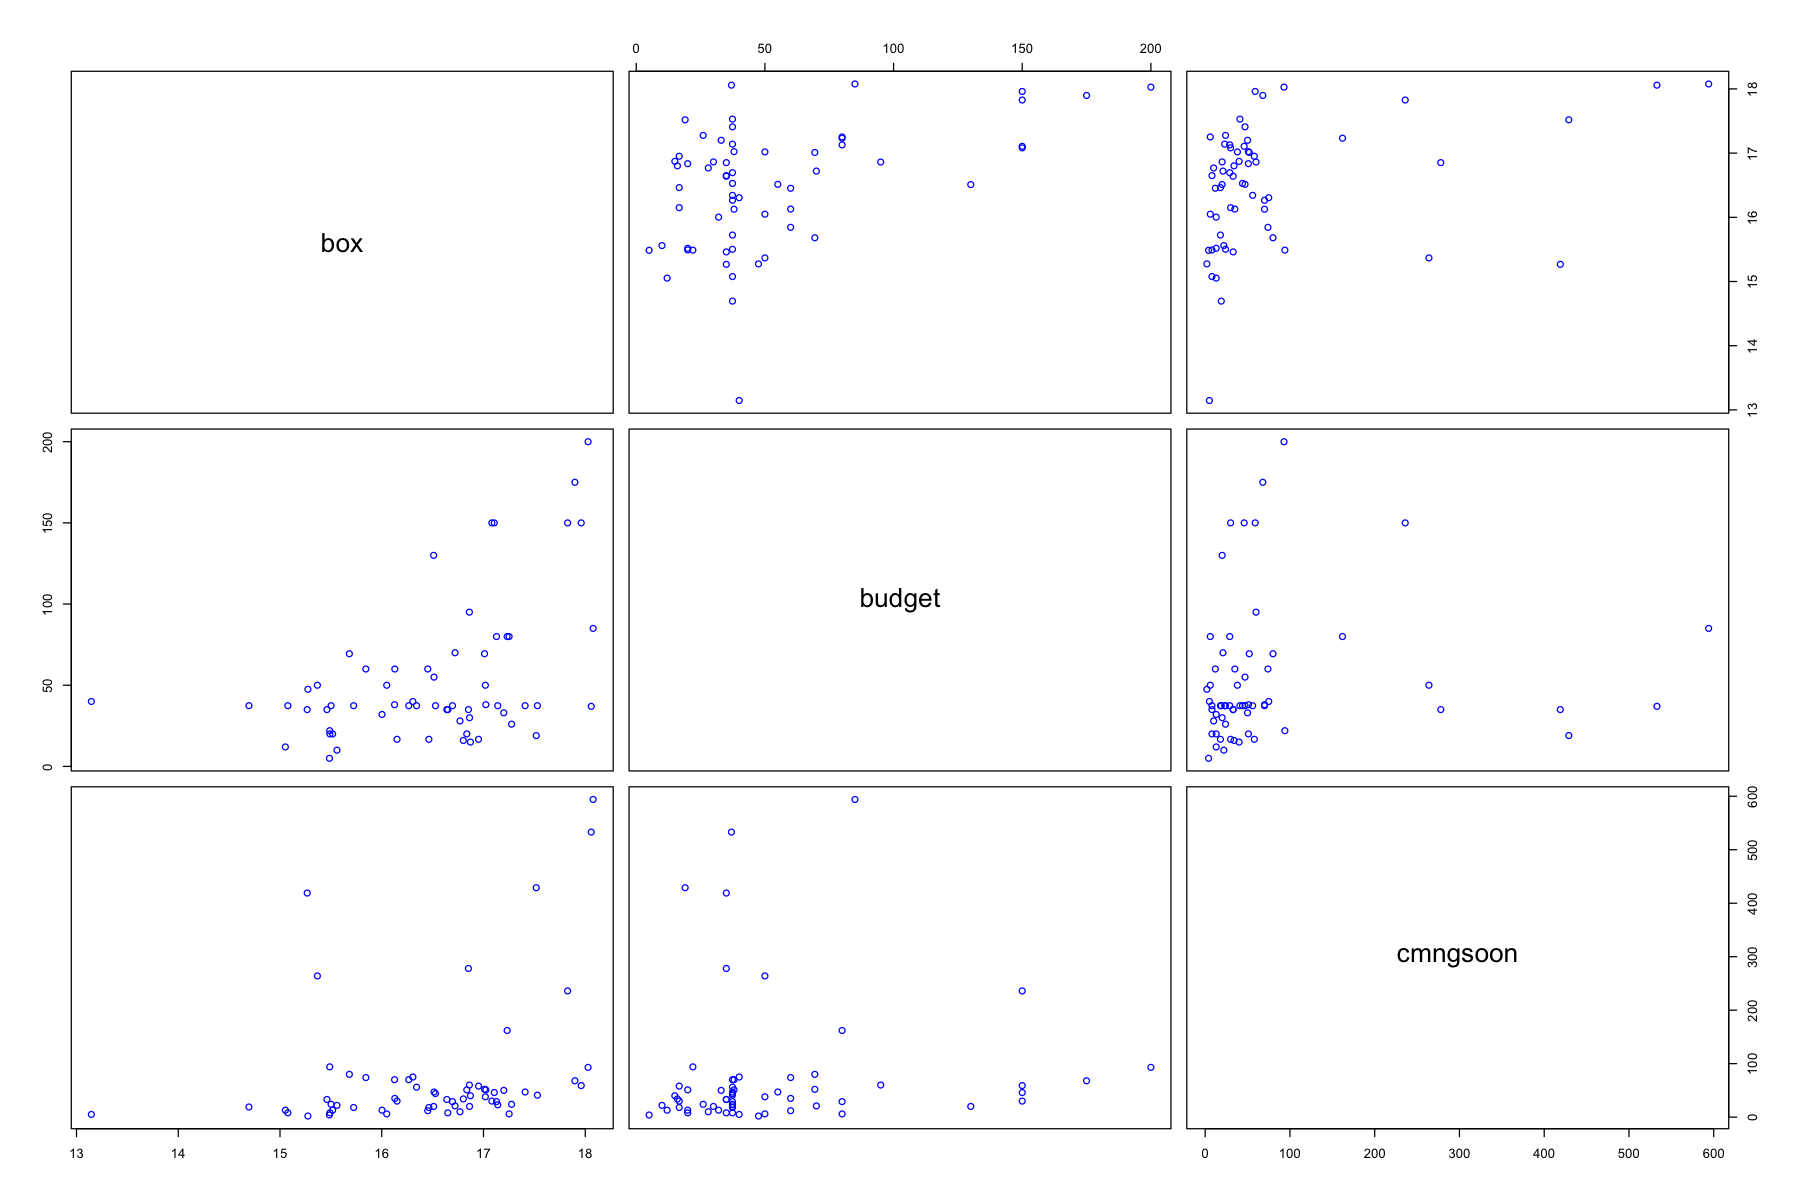

In [27]:
options(repr.plot.width = 15, repr.plot.height = 10)
pairs(mydata[,c(1,2,4)],col="blue")

Regardign the interections between variables we see from the following plots that there is some overlapping (in the three scatter plots) so maybe there will not be interaction but we have to check it.
As concern the boxplots:
- in the first  one from left we don't have a  clear difference between the two medians, the width is different, the whiskers are different and with animated = true box is higher and we have an outlier for TRUE. 

- For the second one we can perform the same consideration saying that budget  is higher for animated, the medians are different suggesting that there could be some interactions.The width is different between animated=TRUE and animated=FALSE and for FALSE we have outliers.

- we don't have a  clear difference between the two medians, the width is different, the whiskers are different and with animated = FALSE cmngsoon is higher and we have and outliers for animated= FALSE

In order to check possible interactions we have to investigate more with regression.

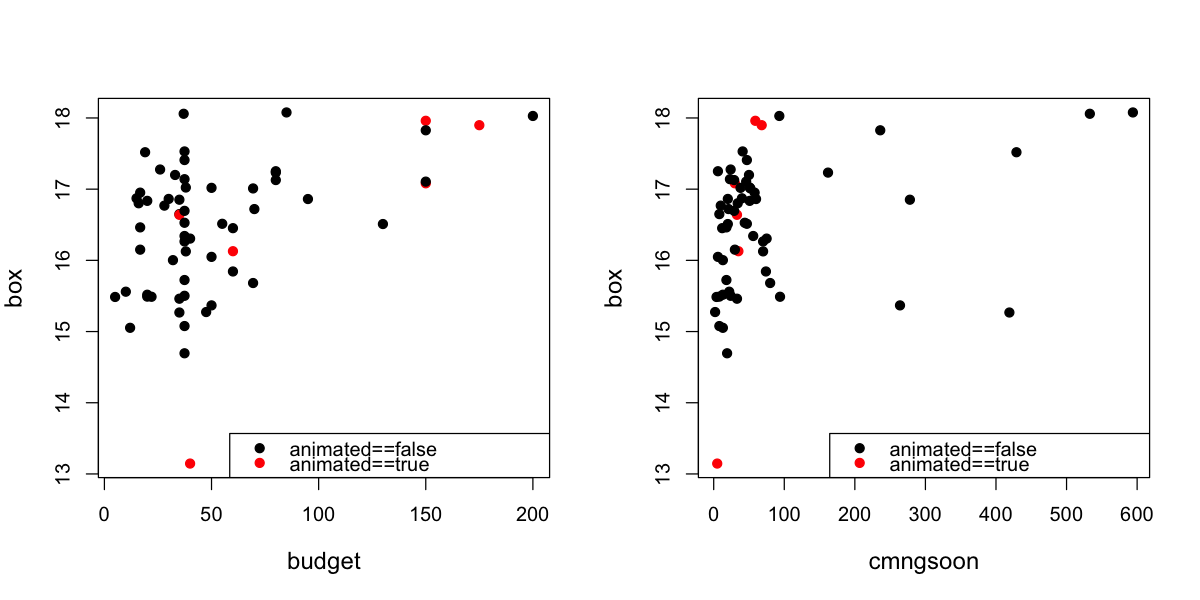

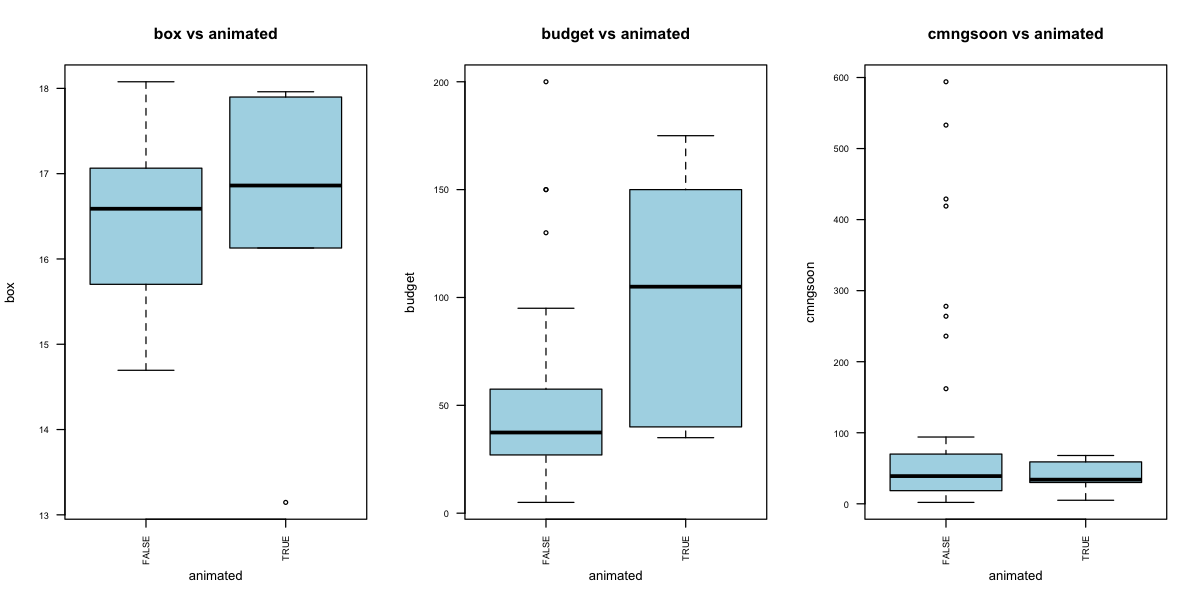

In [28]:
## plot con tutte le variabili in funzione di y per vedere eventuale relazione

##plot per verificare eventuali interazioni, nel caso di variabili di tipo YES/NO o livelli o classe insomme
par(mfrow=c(1,2))
options(repr.plot.width = 10, repr.plot.height = 5)

plot(mydata$budget, mydata$box, cex.lab=1.2, xlab='budget', pch=19,ylab='box',col=mydata$animated)
legend('bottomright', col=c(1,2), pch=c(19,19),
        legend=c('animated==false','animated==true'))



plot(mydata$cmngsoon, mydata$box, cex.lab=1.2, xlab='cmngsoon', pch=19,ylab='box',col=mydata$animated)
legend('bottomright', col=c(1,2), pch=c(19,19),
        legend=c('animated==false','animated==true'))





par(mfrow=c(1,3))
## plot boxplot per eventuali iterazioni (basati pero sempre su quello sopra)
boxplot(mydata$box~ mydata$animated, las=2, cex.axis=0.7,col="lightblue",xlab="animated",
ylab='box', main="box vs animated")


boxplot(mydata$budget~ mydata$animated, las=2, cex.axis=0.7,col="lightblue",xlab="animated",
ylab='budget', main="budget vs animated")

boxplot(mydata$cmngsoon~ mydata$animated, las=2, cex.axis=0.7,col="lightblue",xlab="animated",
ylab='cmngsoon', main="cmngsoon vs animated")



#par(mfrow=c(1,2))
## plot moasic plot
#mosaicplot(table(mydata$prefer,mydata$stories), las=2, cex.axis=0.7,col="lightblue",
#xlab='', main='prefer vs stories ')
#mosaicplot(table( mydata$aircon, mydata$prefer), las=2, cex.axis=0.7,col="lightblue",
#xlab='', main='aircon vs prefer ')
#mosaicplot(table(mydata$x1, mydata$x1-livello), main='x1 vs x1-livello',col="lightblue")
#mosaicplot(table(mydata$x1, mydata$x2-livello), main='x1 vs x2-livello',col="lightblue")
#mosaicplot(table(mydata$x1-livello, mydata$x2-livello), main='x1-livello vs x2-livello',col="lightblue")

### Multiple Linear Regression

After this preliminary analysis we can apply a linear regression. Let's start with a model with all variables and interactions and then perform model selection base ond $P-value$.

So I started with a model including also the interactions between the covariates then the final model I have obtained, that is $box= +15.9+0.008*budget -2.3*animatedTRUE + 0.002*cmngsoon + 0.05*animated*cmngsoon$  is the following output.
In the table below the 95% CI for coefficients is reported.
I tried also with polynomial terms for cmngsoon and budget but they are not significant.

In [29]:
model.mydata3 <- update(model.mydata2, .~.-budget:animated  )
summary(model.mydata3)
confint(model.mydata3)


Call:
lm(formula = box ~ budget + animated + cmngsoon + animated:cmngsoon, 
    data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75479 -0.53717  0.07359  0.60779  1.21553 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           15.9340368  0.1652971  96.396  < 2e-16 ***
budget                 0.0080583  0.0025631   3.144 0.002646 ** 
animatedTRUE          -2.3436926  0.6569115  -3.568 0.000738 ***
cmngsoon               0.0019240  0.0007752   2.482 0.016031 *  
animatedTRUE:cmngsoon  0.0519782  0.0157352   3.303 0.001654 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7437 on 57 degrees of freedom
Multiple R-squared:  0.4188,	Adjusted R-squared:  0.378 
F-statistic: 10.27 on 4 and 57 DF,  p-value: 2.487e-06


2.5 %         97.5 %      
(Intercept)           15.6030351619 16.265038470
budget                 0.0029257614  0.013190791
animatedTRUE          -3.6591351480 -1.028250123
cmngsoon               0.0003718007  0.003476288
animatedTRUE:cmngsoon  0.0204690696  0.083487393

In [30]:
anova(model.mydata,model.mydata3)

Res.Df RSS      Df Sum of Sq  F         Pr(>F)   
1 55     31.37372 NA         NA        NA        NA
2 57     31.52650 -2 -0.1527797 0.1339159 0.8749479

From anova we see that we keep model without all the terms and interaction (the initial one).
Now we can judge also our model considering the residuals. 
The graph of residuals indicates that the model does  not have an acceptabl3 fit. In fact, the first graph (scatter plot of the residuals) shows a  deterministic pattern . In addition, the mean of the residuals does not  appear to be 0 and the variance of the residuals does  not appear to be constant, as it should be based on the assumptions that the regression model places on the ε errors. Furthermore, the normality of the residuals is not  satisfied  as highlighted in the second graph: the empirical quantiles, in fact, do deviate from the theoretical quantiles of a standard normal (except for one of the tails).
To complete the analysis of the residuals,  outliers appear to be present as shown from Cook's distance>1. 
So let's remove it and see if something change.

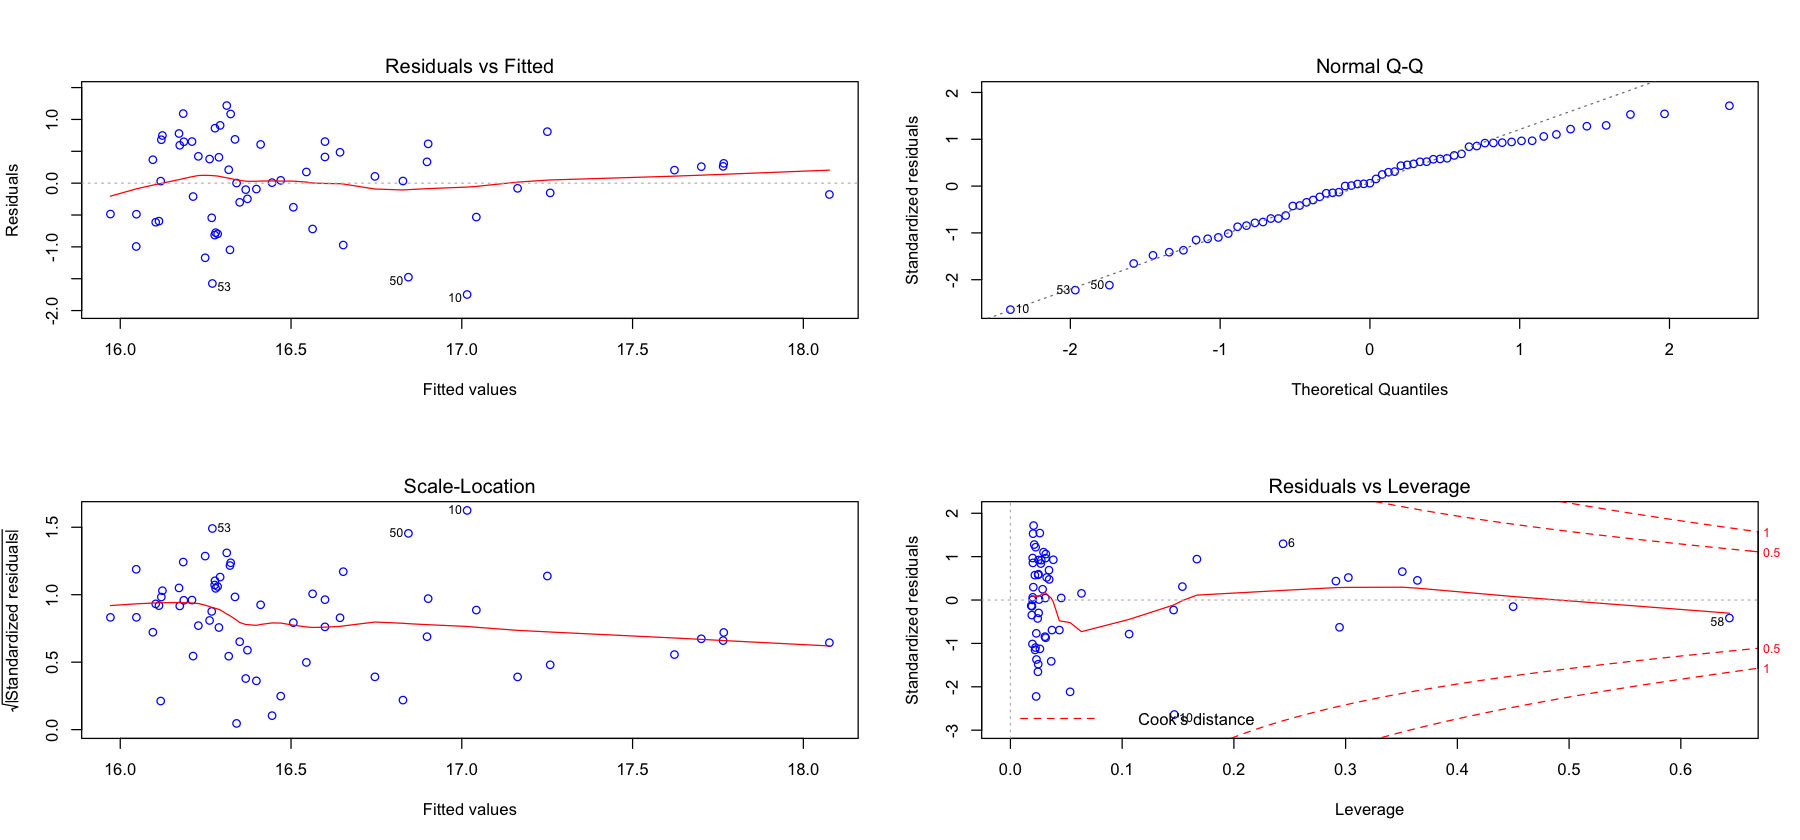

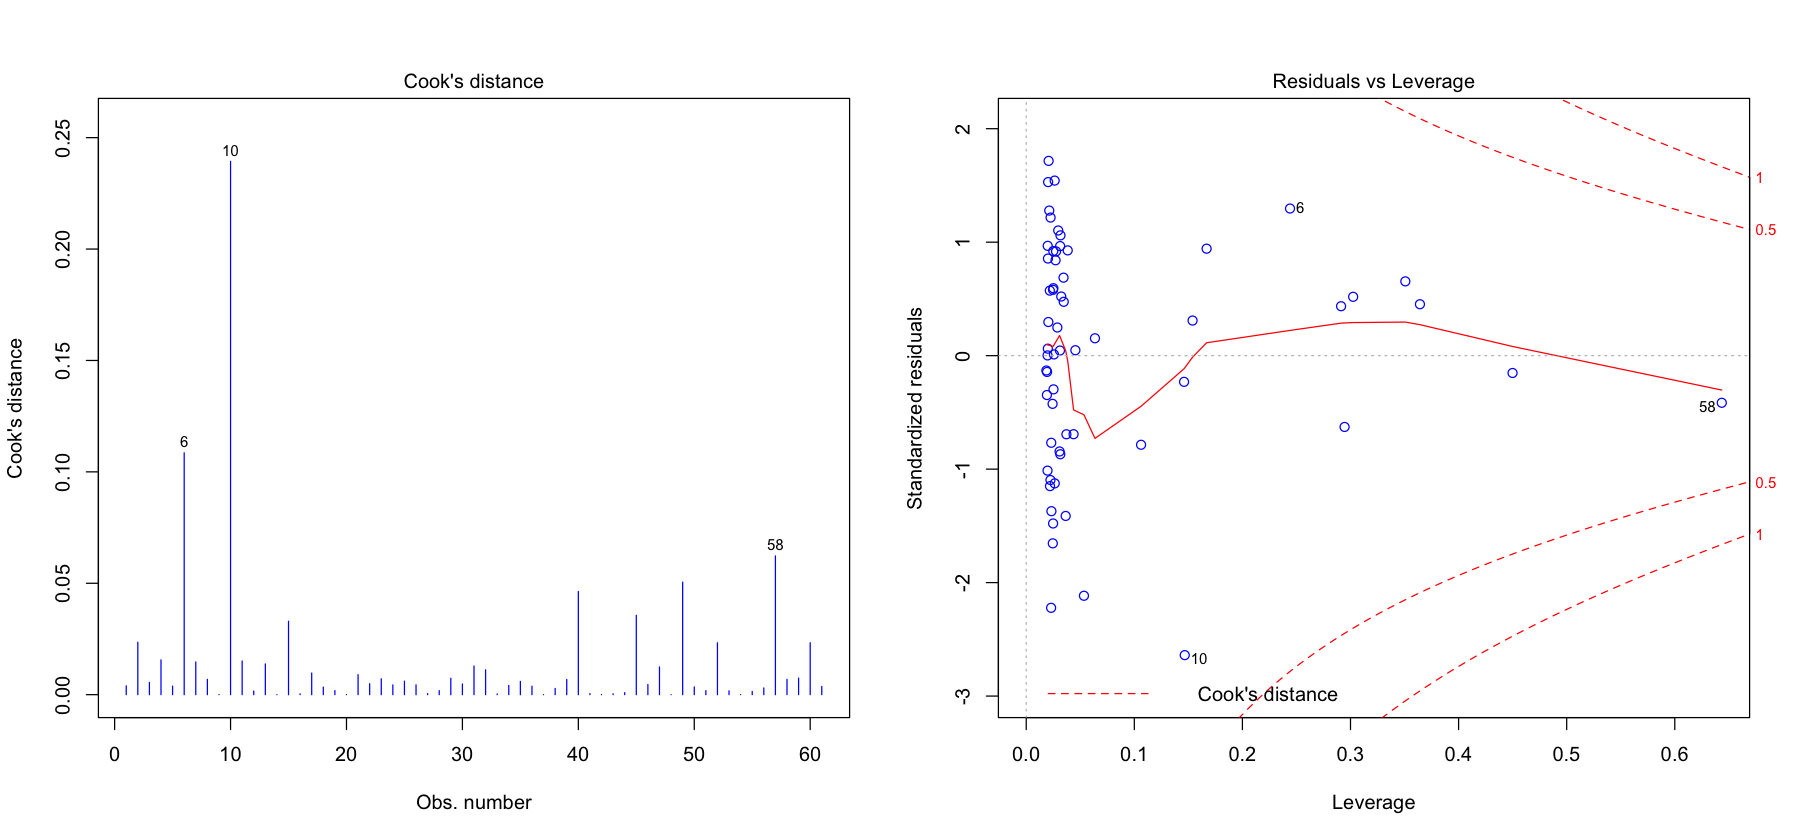

In [35]:
# subdivide the window into 4 parts, 2 rows and 2 columns , residul plot
par(mfrow=c(2,2))
options(repr.plot.width = 15, repr.plot.height = 7)
plot(model.mydata3,col="blue")
### plot the Cook's distance
par(mfrow=c(1,2))
plot(model.mydata3, 4,col="blue")
plot(model.mydata3, 5,col="blue")

In [32]:
mydata<-mydata[-12,]

Removing the outliers leads the animated to lose significance in the model, so let's try another fit removing it and the interactions

In [51]:
model.mydata4 <- lm(box ~ budget+ cmngsoon , data=mydata)
summary(model.mydata4)
confint(model.mydata4)


Call:
lm(formula = box ~ budget + cmngsoon, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7335 -0.4642  0.1049  0.5941  1.2165 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.589e+01  1.536e-01 103.476  < 2e-16 ***
budget      9.257e-03  2.126e-03   4.353 5.52e-05 ***
cmngsoon    1.878e-03  7.334e-04   2.560   0.0131 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7093 on 58 degrees of freedom
Multiple R-squared:  0.3204,	Adjusted R-squared:  0.297 
F-statistic: 13.67 on 2 and 58 DF,  p-value: 1.364e-05


2.5 %        97.5 %      
(Intercept) 1.558282e+01 16.197599947
budget      5.000389e-03  0.013512714
cmngsoon    4.096702e-04  0.003345711

We obtain a model $box=15.9+ 0.009* budget +0.003* cmngsoon$. We see that the residuals in this case are goos and doesn't not present a deterministic path.

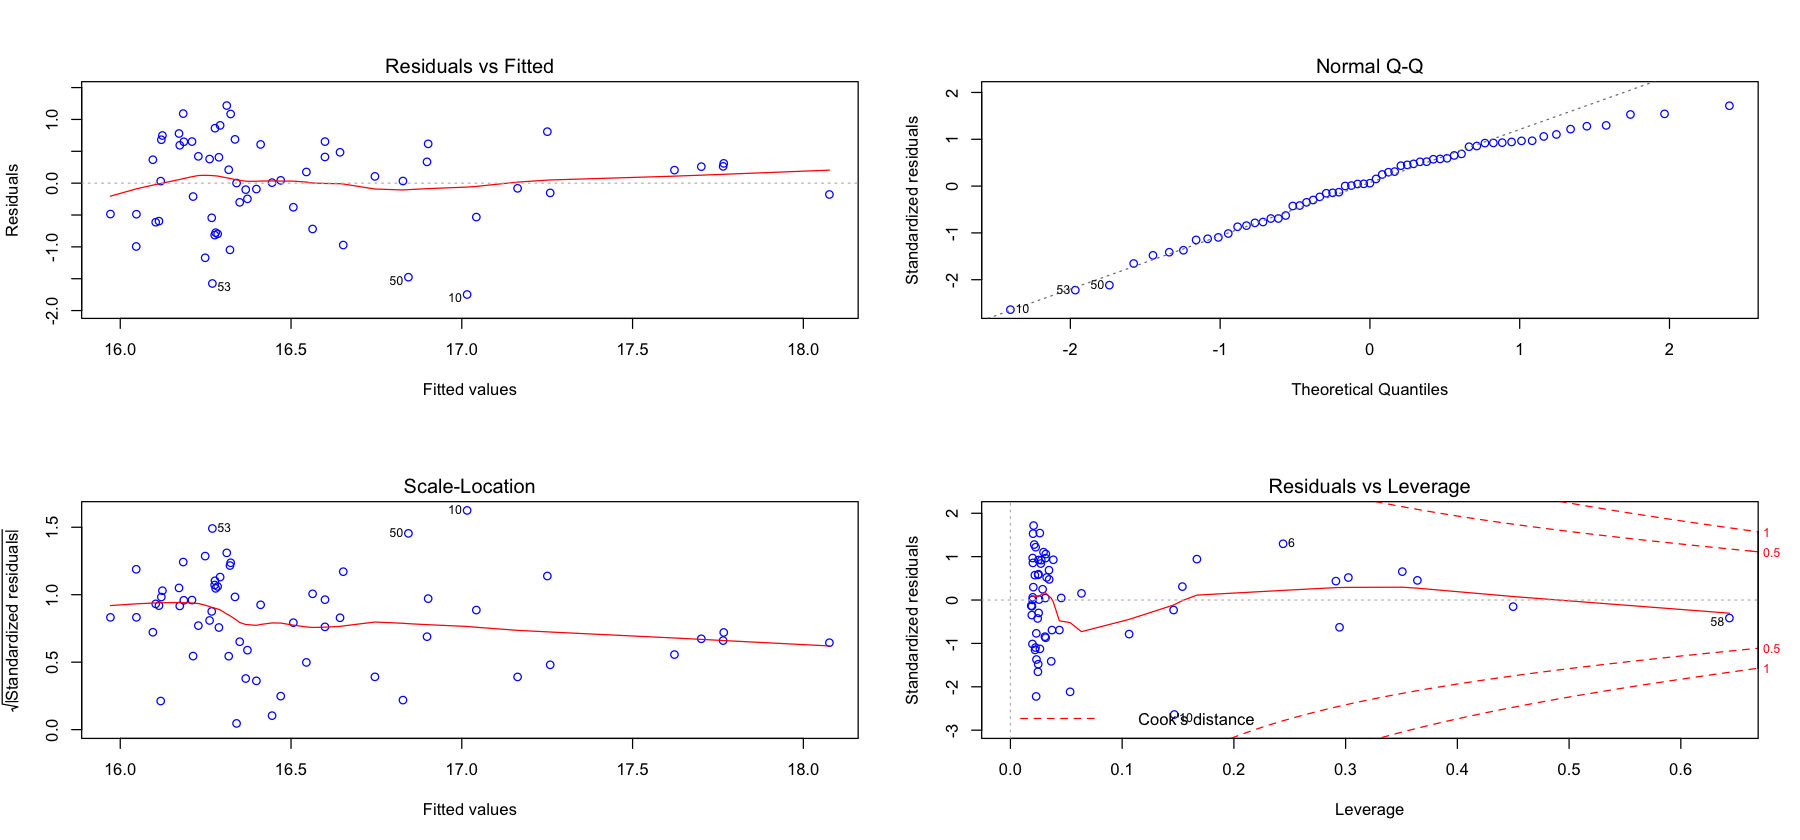

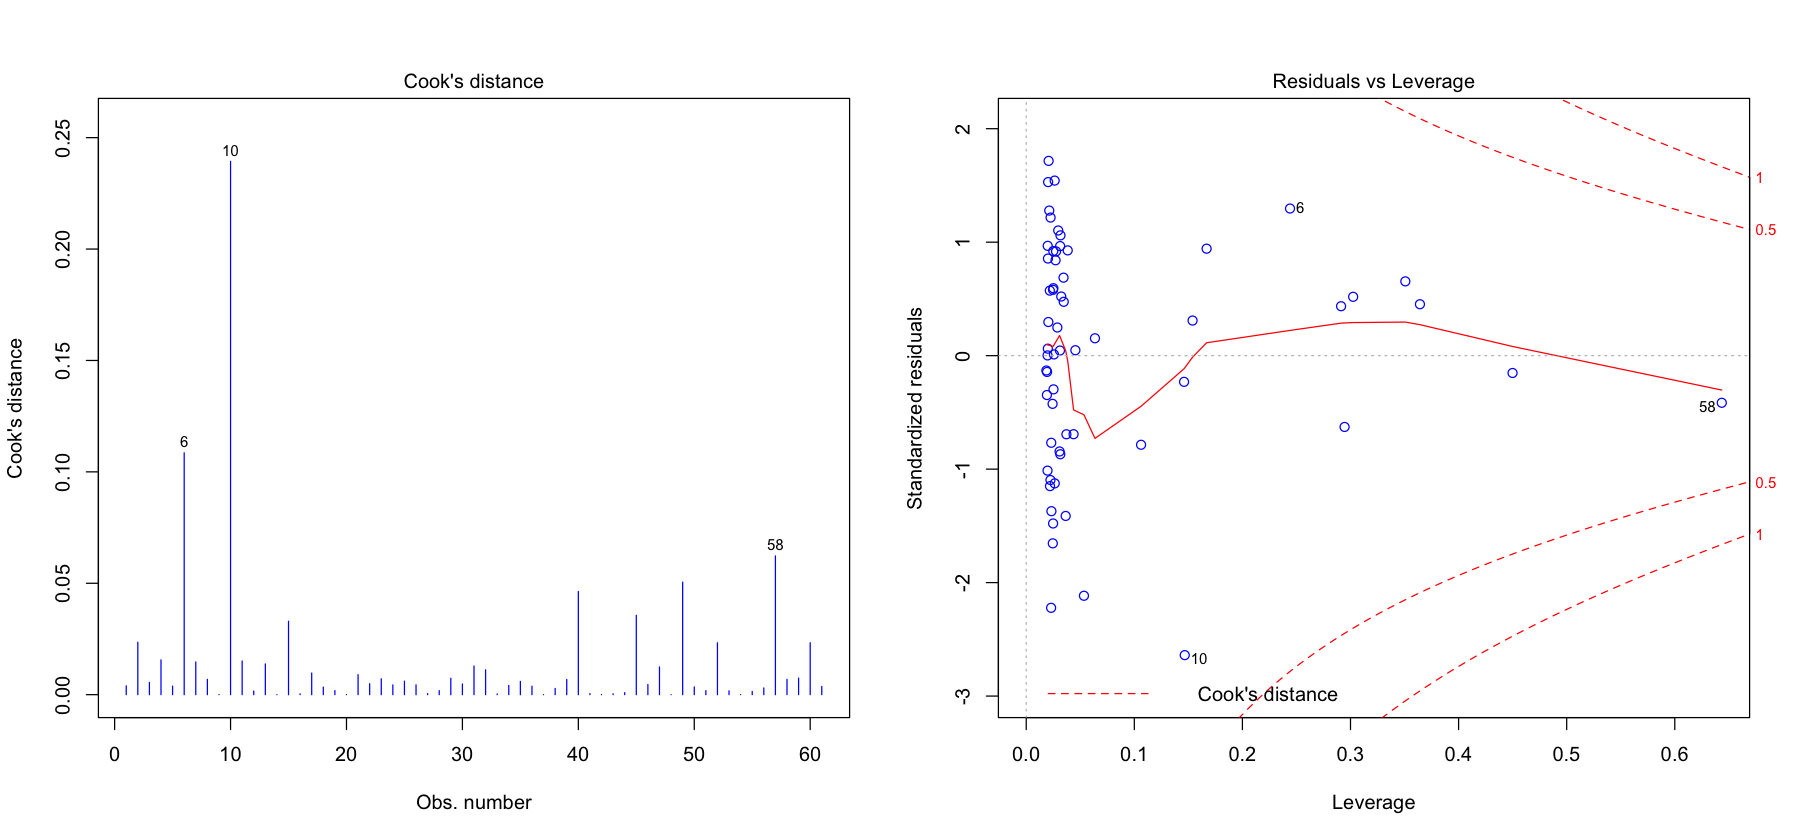

In [52]:
# subdivide the window into 4 parts, 2 rows and 2 columns , residul plot
par(mfrow=c(2,2))
options(repr.plot.width = 15, repr.plot.height = 7)
plot(model.mydata3,col="blue")
### plot the Cook's distance
par(mfrow=c(1,2))
plot(model.mydata3, 4,col="blue")
plot(model.mydata3, 5,col="blue")

Let's compare the model obtained with the outlier with the one without the outlier using anova. We see the model without animated (due to elimination of outlier value) is preferable. So our final model is : $box=15.9+ 0.009* budget +0.003* cmngsoon$

In [53]:
anova(model.mydata3,model.mydata4)

Res.Df RSS      Df Sum of Sq  F         Pr(>F)   
1 56     28.79292 NA         NA        NA        NA
2 58     29.18307 -2 -0.3901517 0.3794074 0.6860122

let's also try with smooth splines to see if we obtaine better model. In order to find the degrees of freedom I have used the cross validation (9 for  budget 4  for cmngsoon). I report just the gam output for cmngsoon since it is the most interested( for budget splines is not useful based on p-value)

In [63]:
m.gam <- gam(box ~ budget + s(cmngsoon,4),
#+s(x5, degree of freedoms find before)*x6 (se hai interazione)
#altre variabili del best model,
data=mydata)
summary(m.gam)

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


Call: gam(formula = box ~ budget + s(cmngsoon, 4), data = mydata)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-1.53341 -0.46280  0.07629  0.50166  1.09710 

(Dispersion Parameter for gaussian family taken to be 0.4628)

    Null Deviance: 42.9432 on 60 degrees of freedom
Residual Deviance: 25.453 on 55 degrees of freedom
AIC: 133.794 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
               Df  Sum Sq Mean Sq F value    Pr(>F)    
budget          1  9.0506  9.0506 19.5569 4.652e-05 ***
s(cmngsoon, 4)  1  3.3608  3.3608  7.2622  0.009322 ** 
Residuals      55 25.4530  0.4628                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
               Npar Df Npar F   Pr(F)  
(Intercept)                            
budget                                 
s(cmngsoon, 4)       3 2.6867 0.05532 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

From the output,based on $P-value$ we see that we don't need smoothing splines (even if we are in a borderline for cmngsoon since we have $p-value$=0.055 (greater than 0.05 by the way) ).
In the following plot we there are the  predictions based on this model.

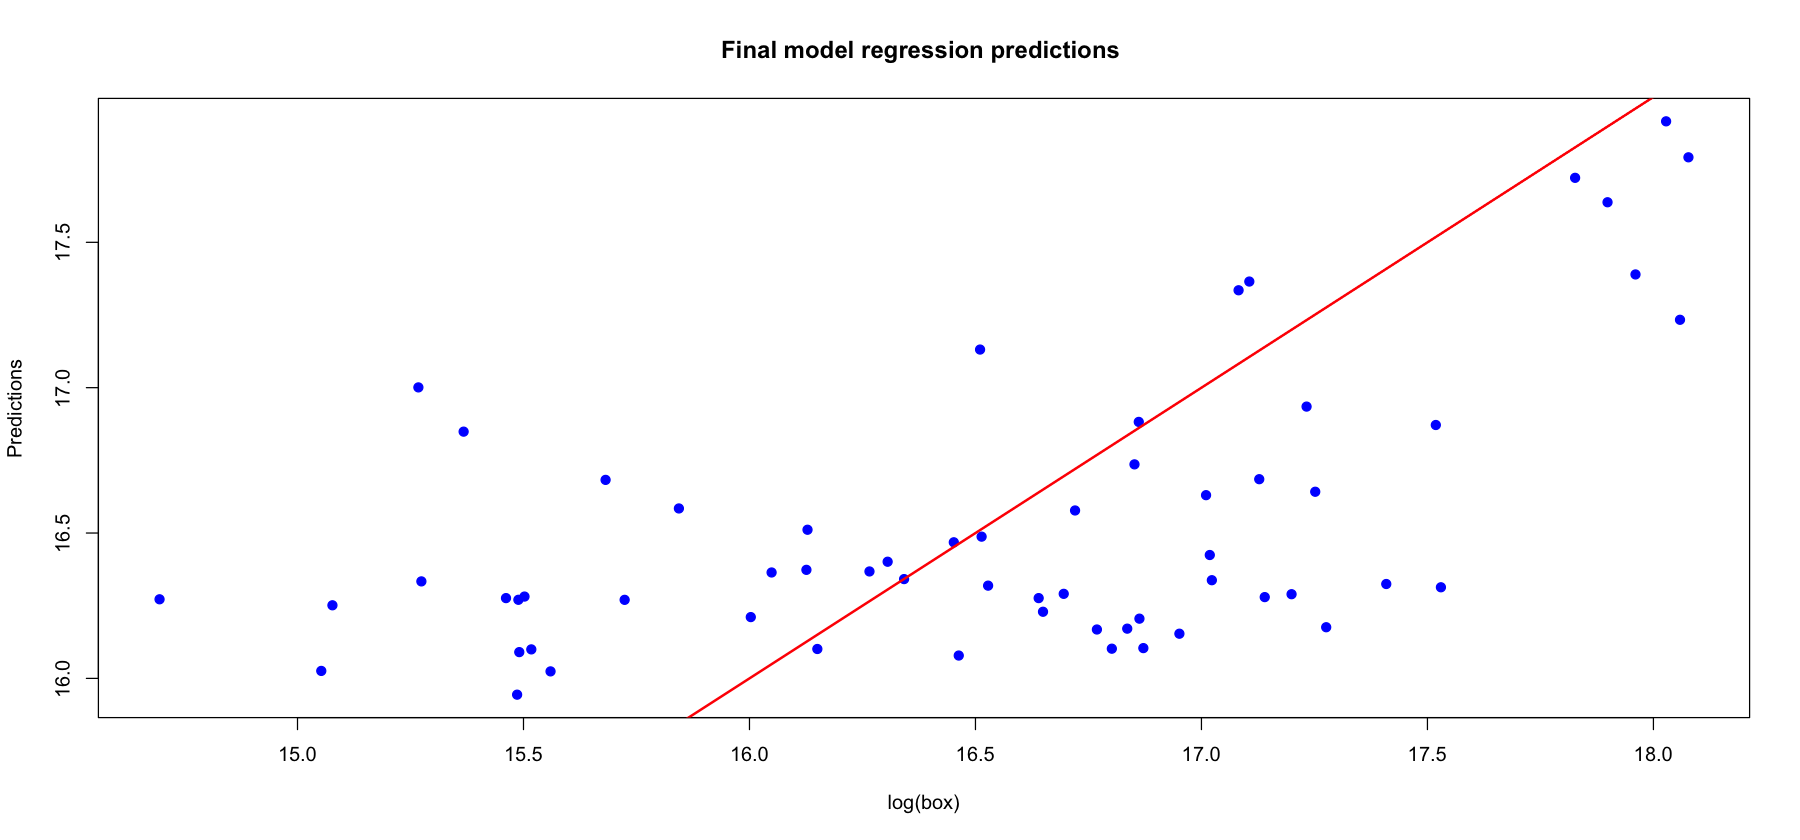

In [67]:
### plot prediction

plot(mydata$box, predict(model.mydata4), xlab='log(box)', ylab='Predictions',
       pch=19, main='Final model regression predictions ',col="blue")
abline(0, 1, col='red', lwd=2)

# Conclusion Point 1

We have that:
- boxs depend positevly from budget
- boxs depend positevly from cmngsoon

The final model for the subset is:  $box=15.9+ 0.009* budget +0.003* cmngsoon$

### RIDGE
Let's consider all the dataset.

In [70]:
## load the data

load("movie.RData")
ls()
names(movie)
mydata<-movie
nrow(mydata)
ncol(mydata)




summary(mydata)
#check NA values
sum(is.na(mydata))
#clean from NA
mydata <- na.omit(mydata)

mydata$box<-log((mydata$box))
#to remove infinite

mydata<-mydata[-12,]
mydata[1:3,]
mydata$animated<-as.factor(mydata$animated)
mydata$sequel<-as.factor(mydata$sequel)
mydata$action<-as.factor(mydata$action)
mydata$horror<-as.factor(mydata$horror)
mydata$comedy<-as.factor(mydata$comedy)

[1] "m.gam"         "model.mydata"  "model.mydata2" "model.mydata3"
[5] "model.mydata4" "movie"         "mydata"        "x1.cv"        
[9] "x2.cv"

[1] "box"       "mprating"  "budget"    "starpower" "sequel"    "action"   
 [7] "comedy"    "animated"  "horror"    "addict"    "cmngsoon"  "fandango" 
[13] "cntwait"

[1] 62

[1] 13

      box           mprating     budget         starpower       sequel  
 Min.   :  511920   1: 2     Min.   :  5.00   Min.   : 0.00   FALSE:53  
 1st Qu.: 6956492   2:15     1st Qu.: 30.50   1st Qu.:12.16   TRUE : 9  
 Median :16930926   3:28     Median : 37.40   Median :18.07             
 Mean   :20720651   4:17     Mean   : 53.29   Mean   :18.03             
 3rd Qu.:26696144            3rd Qu.: 60.00   3rd Qu.:24.09             
 Max.   :70950500            Max.   :200.00   Max.   :36.76             
   action     comedy    animated    horror       addict         cmngsoon     
 FALSE:48   FALSE:42   FALSE:56   FALSE:56   Min.   :  568   Min.   :  2.00  
 TRUE :14   TRUE :20   TRUE : 6   TRUE : 6   1st Qu.: 1671   1st Qu.: 19.25  
                                             Median : 3480   Median : 36.50  
                                             Mean   : 5934   Mean   : 78.21  
                                             3rd Qu.: 7836   3rd Qu.: 66.00  
                     

[1] 0

box      mprating budget starpower sequel action comedy animated horror
1 16.76871 4         28.0  19.83     FALSE  FALSE  TRUE   FALSE    FALSE 
2 17.96034 2        150.0  32.69     TRUE   FALSE  FALSE  TRUE     FALSE 
3 15.50221 4         37.4  15.69     FALSE  FALSE  TRUE   FALSE    FALSE 
  addict cmngsoon fandango cntwait
1 7860.5 10       144      0.49   
2 5737.0 59       468      0.79   
3  850.0 24       198      0.36

We see that  14  over the graph indicate the number of covariates entering the model as  $ \lambda$ varies: 14 is repeated, as ridge regression is not a selection method.

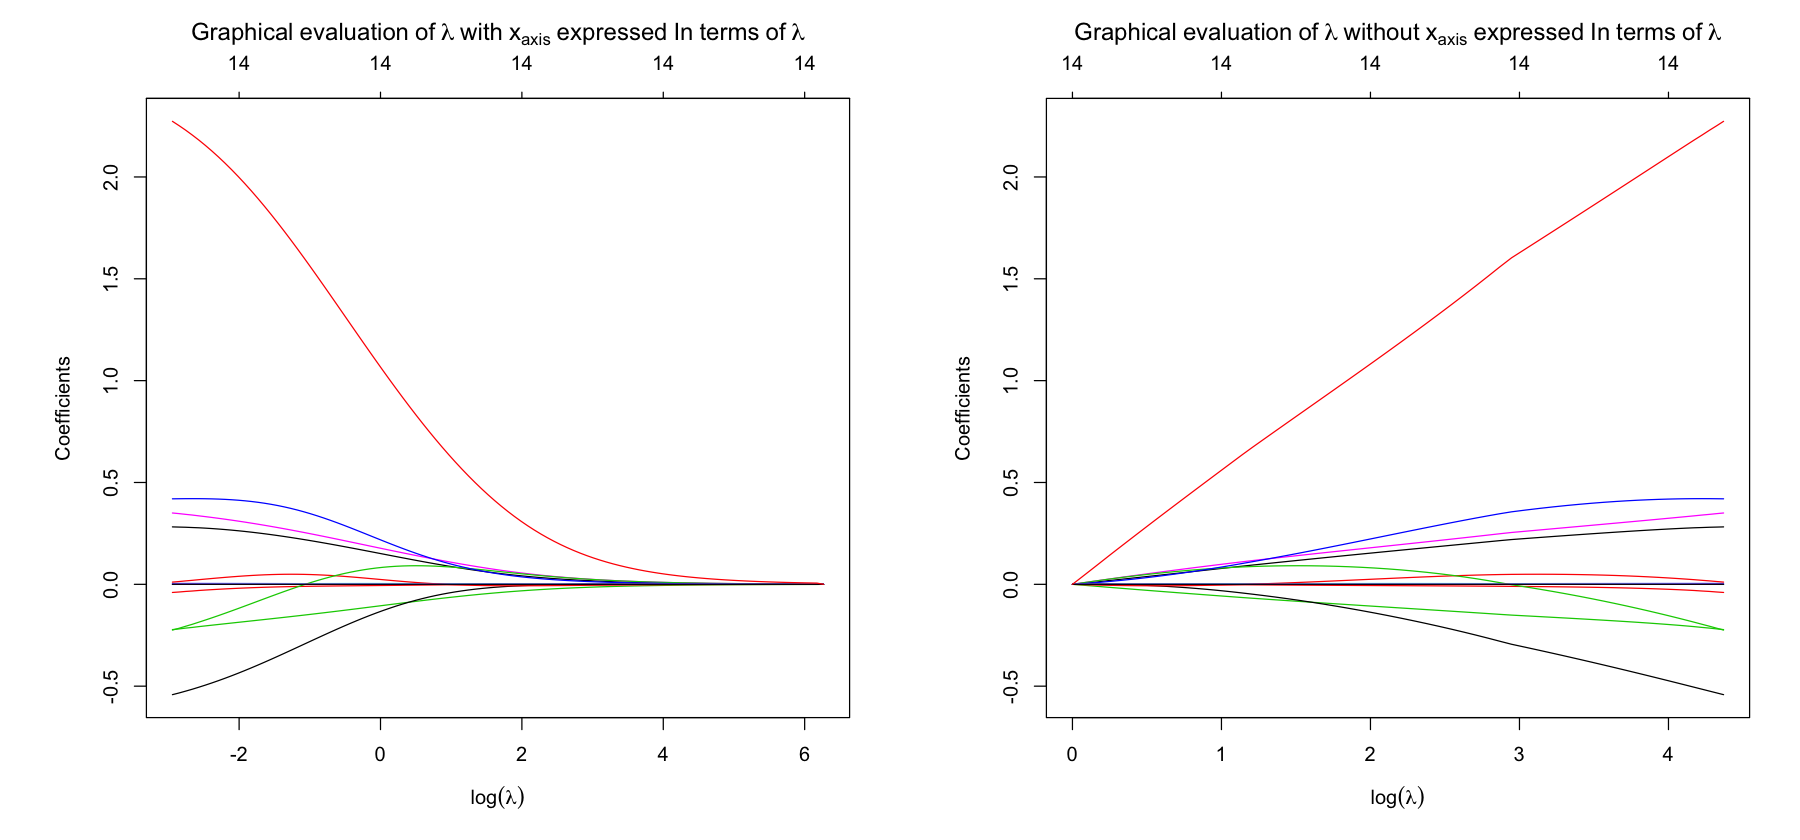

In [78]:
library(glmnet)
y <-  mydata$box
X <- model.matrix(box ~ ., data=mydata)[,-1]
m.ridge <- glmnet(X, y, alpha=0)

## plot graphical evaluation

options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.ridge, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.ridge, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
The plot below shows the values of $cvm$ for each $log(\lambda)$ together with the associated confidence interval. The two dashed lines are the values of minimun $log(\lambda)$  and $log(\lambda)$ $1 \sigma$ far from the minimum. \
So the best $\lambda$  from cross validation is: 0.23 \
And the MSE is: 0.42

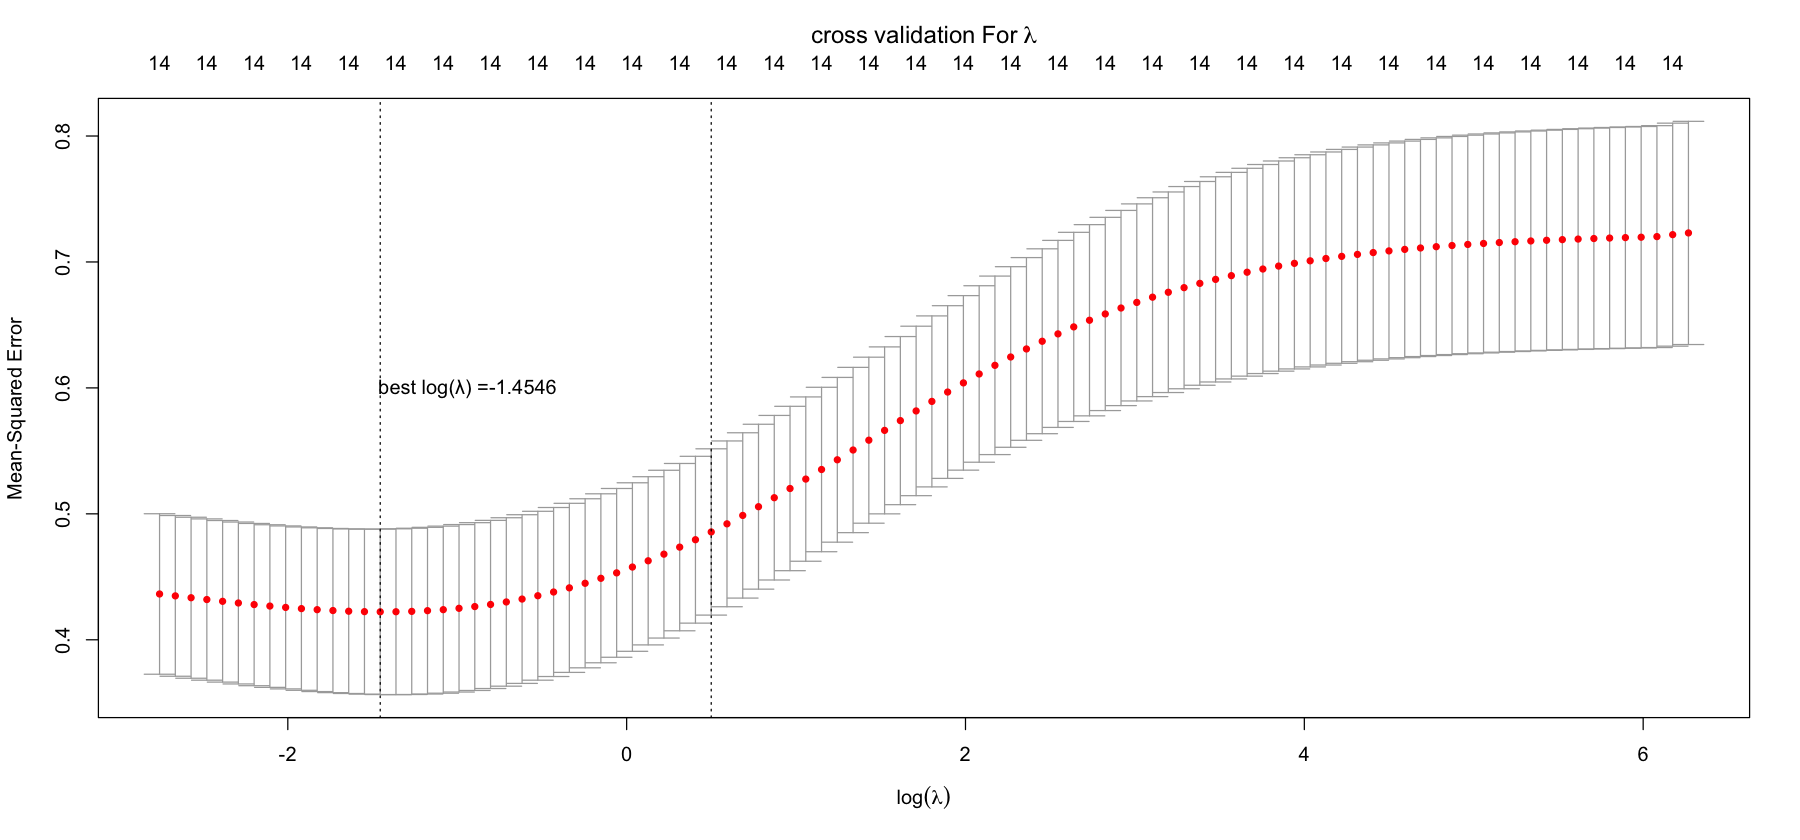

In [79]:
### cross validation plot

set.seed(2906)
options(warn=-1)
cv.ridge <- cv.glmnet(X, y, alpha=0)
plot(cv.ridge, xlab=expression(log(lambda)))
text(x=log(cv.ridge$lambda.min)+0.5, y=0.6, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.ridge$lambda.min


mse<-min(cv.ridge$cvm)


Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to:0.61


Call:  glmnet(x = X, y = y, alpha = 0, lambda = best.lambda) 

     Df   %Dev Lambda
[1,] 14 0.5857 0.2335

15 x 1 sparse Matrix of class "dgCMatrix"
                        s0
(Intercept)   1.518598e+01
mprating2     2.395706e-01
mprating3    -1.278229e-02
mprating4    -1.657099e-01
budget        3.691353e-03
starpower     2.619087e-03
sequelTRUE    2.789123e-01
actionTRUE   -3.535089e-01
comedyTRUE    4.861000e-02
animatedTRUE -4.695996e-02
horrorTRUE    3.868300e-01
addict        2.164091e-05
cmngsoon      4.786077e-04
fandango      1.094037e-04
cntwait       1.774320e+00

[1] 0.6096466

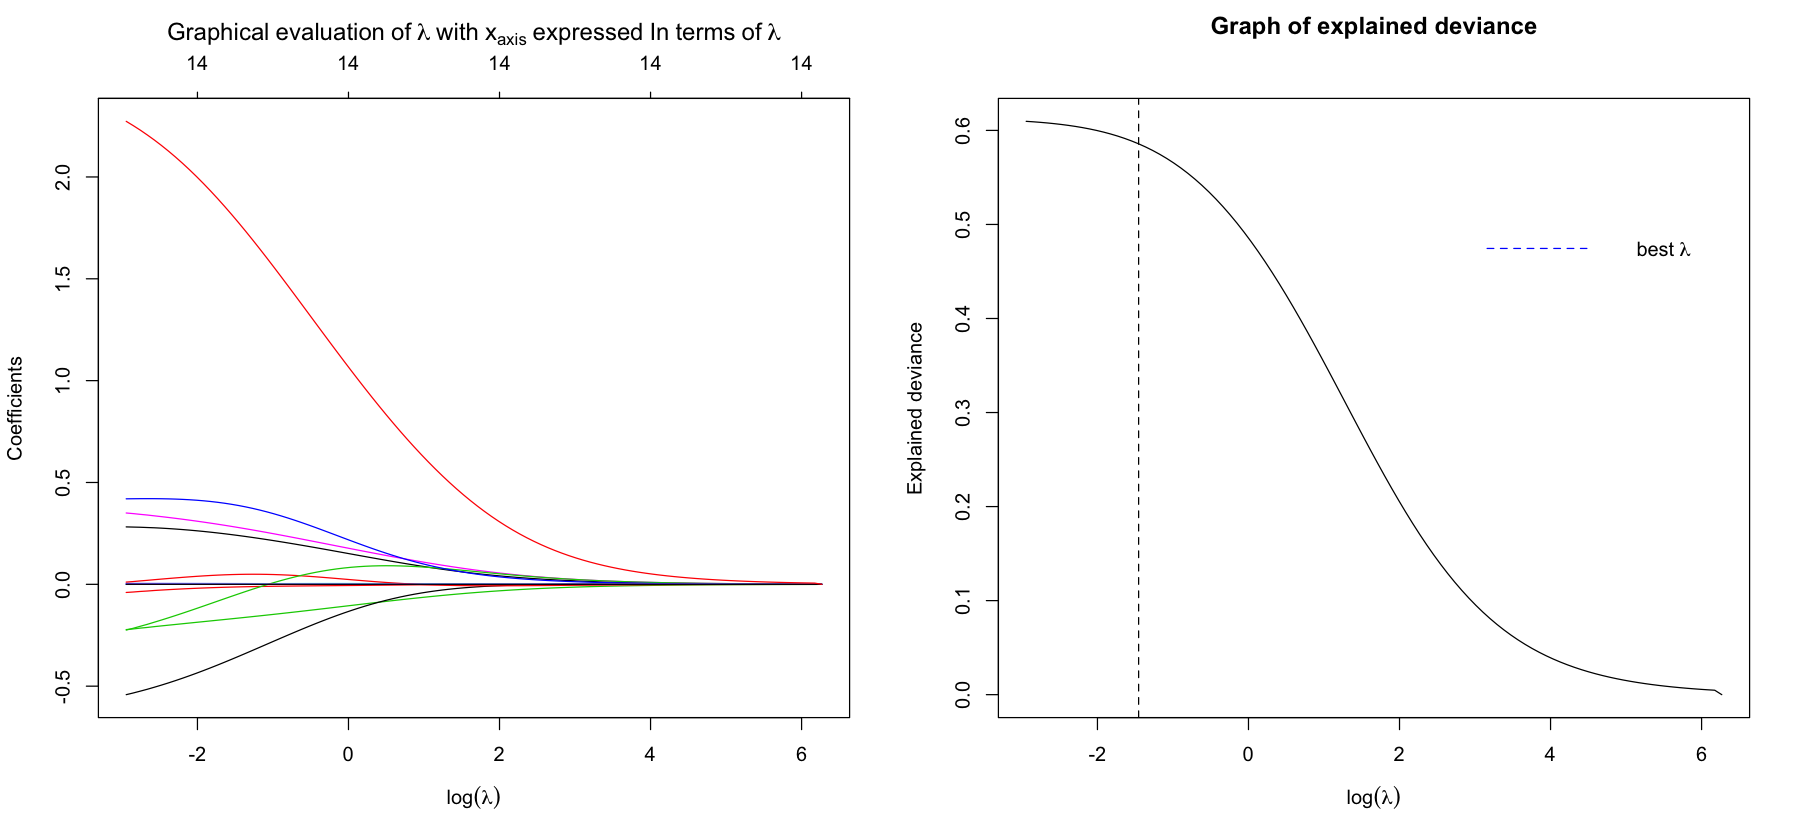

In [80]:
## best model

m.ridge.min <- glmnet(X, y, alpha=0, lambda=best.lambda)
m.ridge.min
coef(m.ridge.min)

par(mfrow=c(1,2))
plot(m.ridge, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.ridge$lambda), m.ridge$dev.ratio, type='l',
       xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,color="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 2.5,bty="n", y=0.5)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.ridge$dev.ratio)

### LASSO

Let's perform the analysis usign lasso.

Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that 14 over the graph indicate the number of covariates entering the model as  $ \lambda$ varies:14 is not repeated, as lasso regression is a selection method.

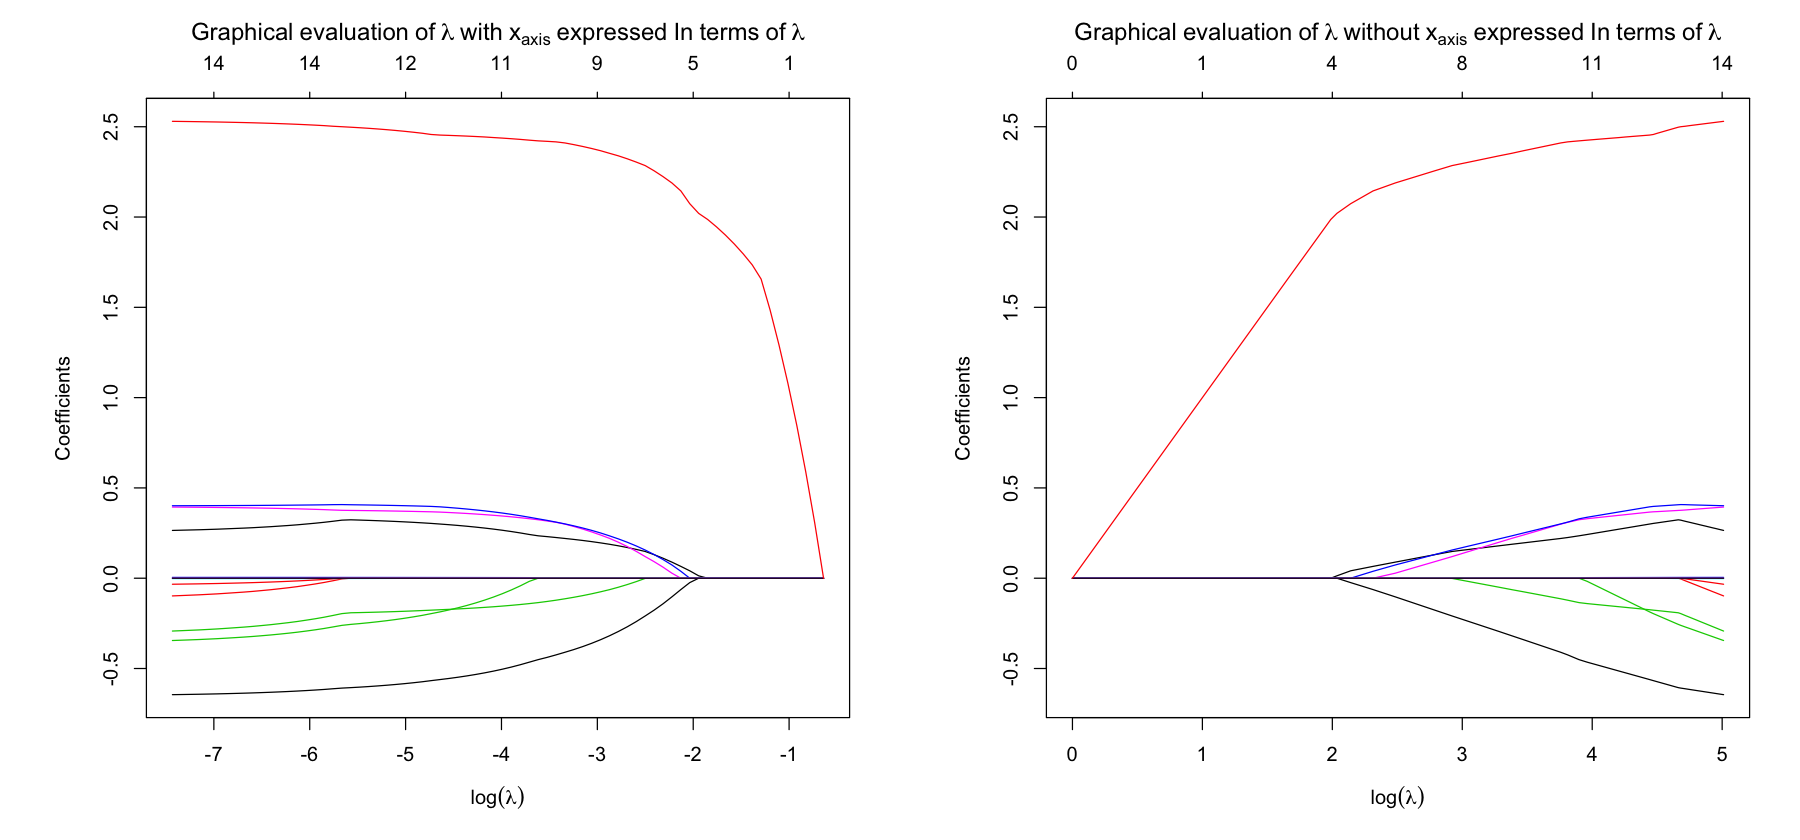

In [81]:
## lasso regression
library(glmnet)
m.lasso <- glmnet(X, y, alpha=1)
options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.lasso, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.lasso, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
So the best $\lambda$  from cross validation is: 0.03 \
And the MSE is: 0.42

[1] 0.03233783

[1] 0.419153

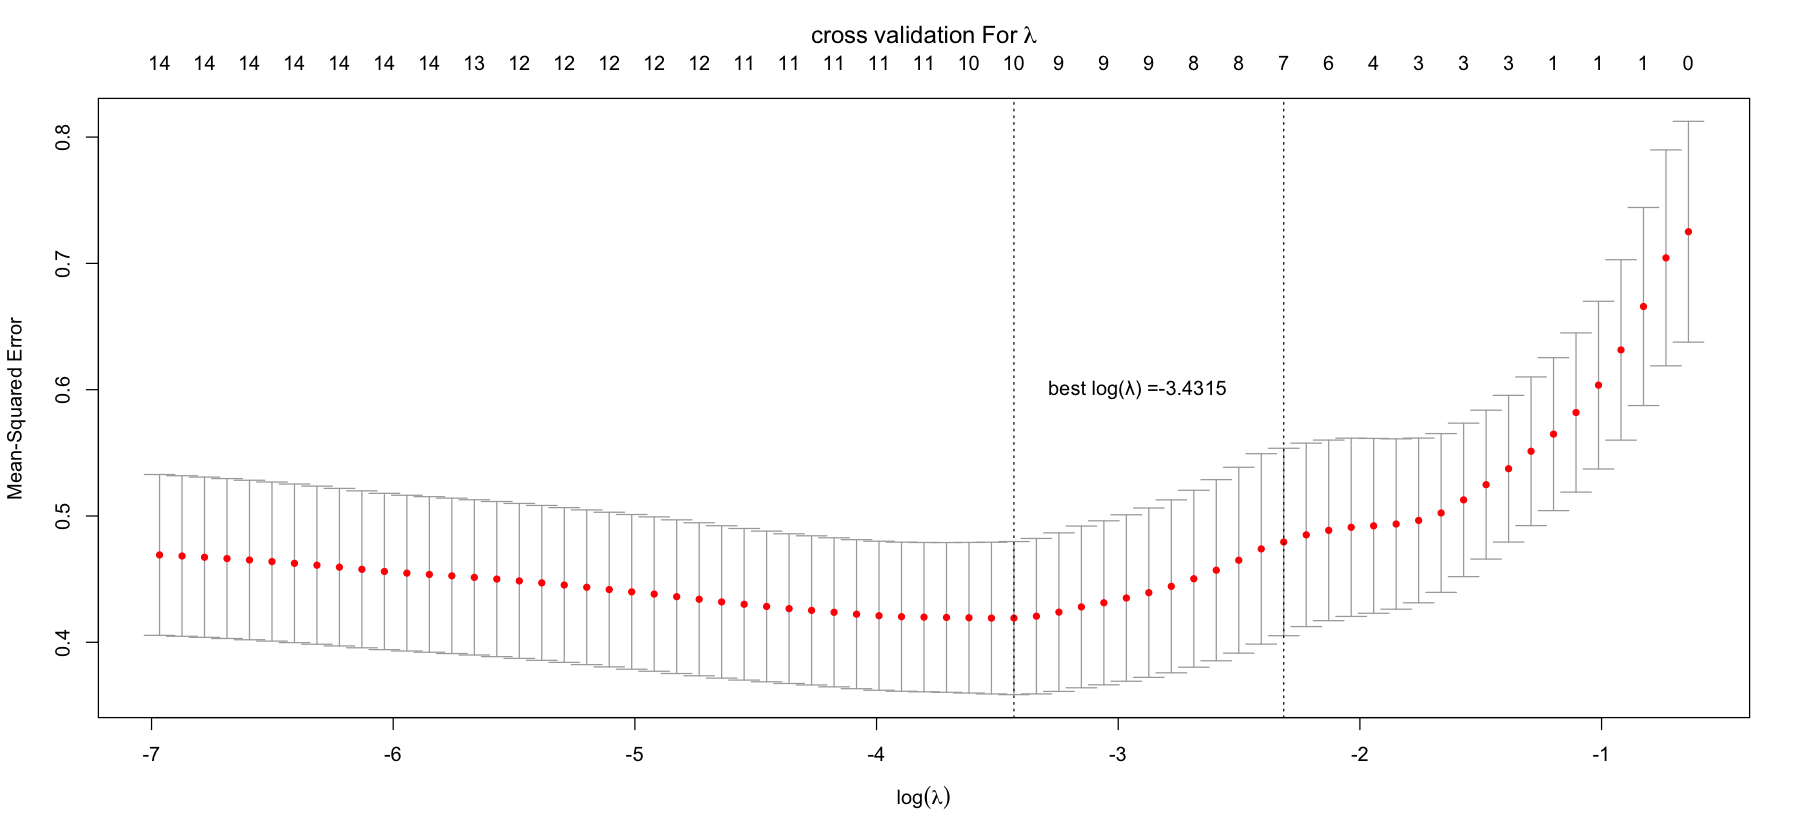

In [84]:
set.seed(2906)
options(warn=-1)
cv.lasso <- cv.glmnet(X, y, alpha=1)
plot(cv.lasso, xlab=expression(log(lambda)))
text(x=log(cv.lasso$lambda.min)+0.5, y=0.6, paste0(" best log(λ) =",round((log(cv.lasso$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.lasso$lambda.min
best.lambda

mse<-min(cv.lasso$cvm)
mse

On the basis of MSE , the model fitted with lasso has got the same MSE  by the way The resulting model with lasso is simpler.
Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to: 0.61 \
Furthermore from the new coefficients we can see that some of the coefficients are zero, so the lasso performed a model selection. In particular thenot coefficients equal to 0 are= comedy, animated and starpower. Also mprating3 is set to 0.


Call:  glmnet(x = X, y = y, alpha = 1, lambda = best.lambda) 

     Df  %Dev  Lambda
[1,] 10 0.593 0.03234

15 x 1 sparse Matrix of class "dgCMatrix"
                        s0
(Intercept)   1.503304e+01
mprating2     2.252352e-01
mprating3     .           
mprating4    -1.216300e-01
budget        3.095863e-03
starpower     .           
sequelTRUE    3.091528e-01
actionTRUE   -4.247813e-01
comedyTRUE    .           
animatedTRUE  .           
horrorTRUE    3.110032e-01
addict        2.485345e-05
cmngsoon      1.653581e-05
fandango      2.052026e-05
cntwait       2.416193e+00

[1] 11

[1] 0.6127222

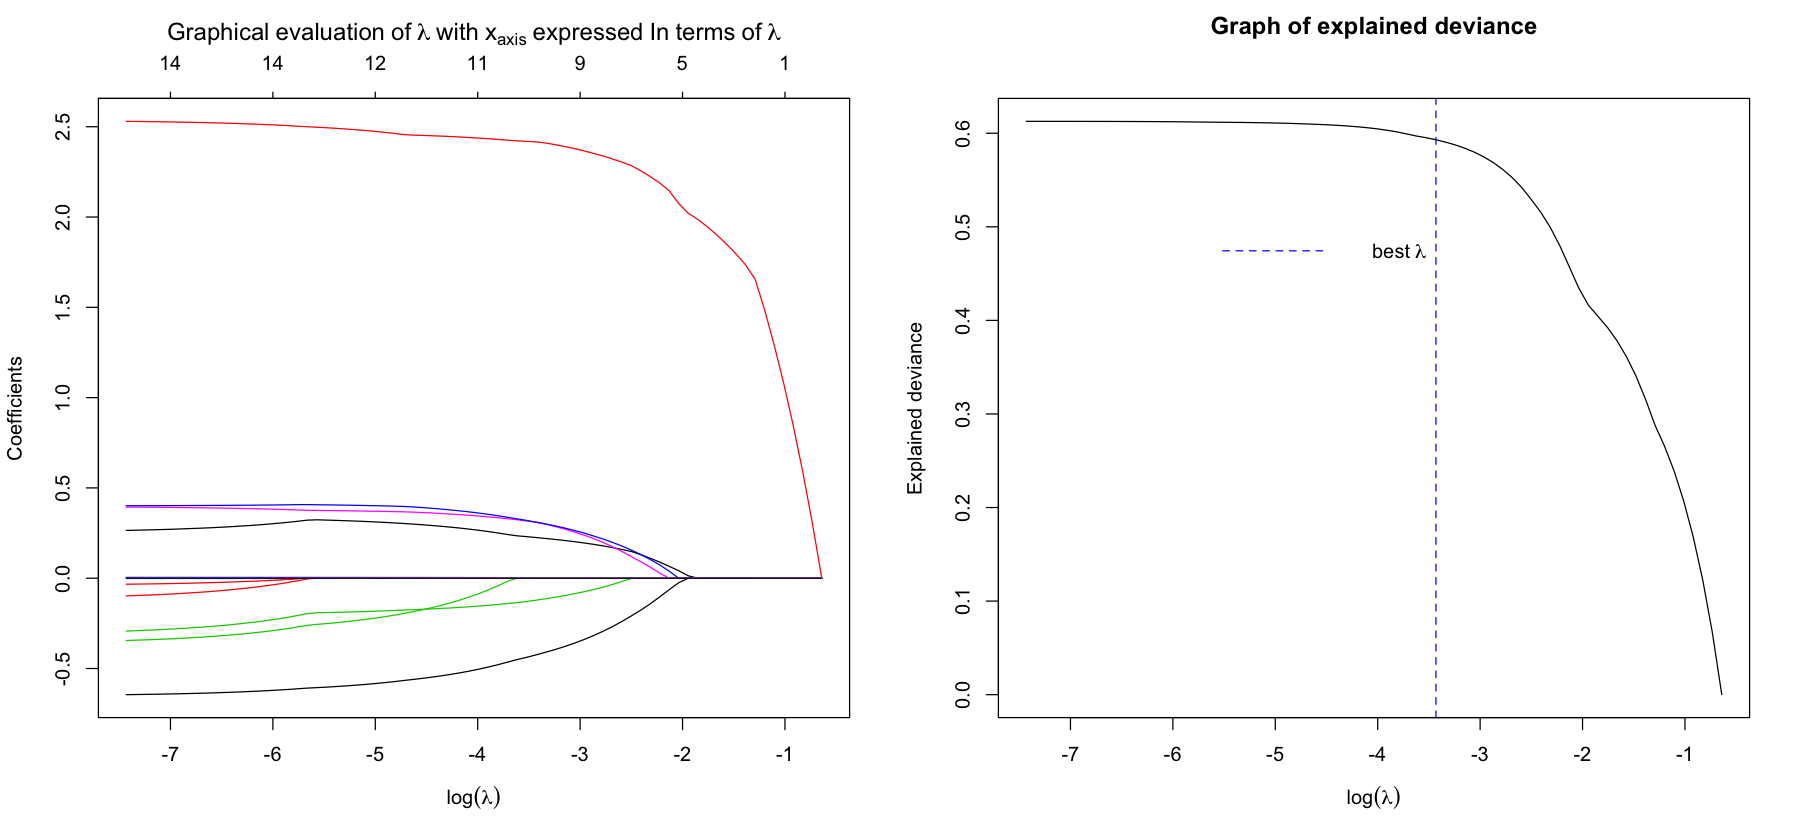

In [86]:
#### best model

m.lasso.min <- glmnet(X, y, alpha=1, lambda=best.lambda)
m.lasso.min
coef(m.lasso.min)

## number of coefficient diversi da 0

id.zero <- which(coef(m.lasso.min)==0)
nonzero <- length(coef(m.lasso.min))-length(id.zero)
nonzero



par(mfrow=c(1,2))
plot(m.lasso, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.lasso$lambda), m.lasso$dev.ratio, type='l',
        xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,col="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = -6,bty="n", y=0.5)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.lasso$dev.ratio)

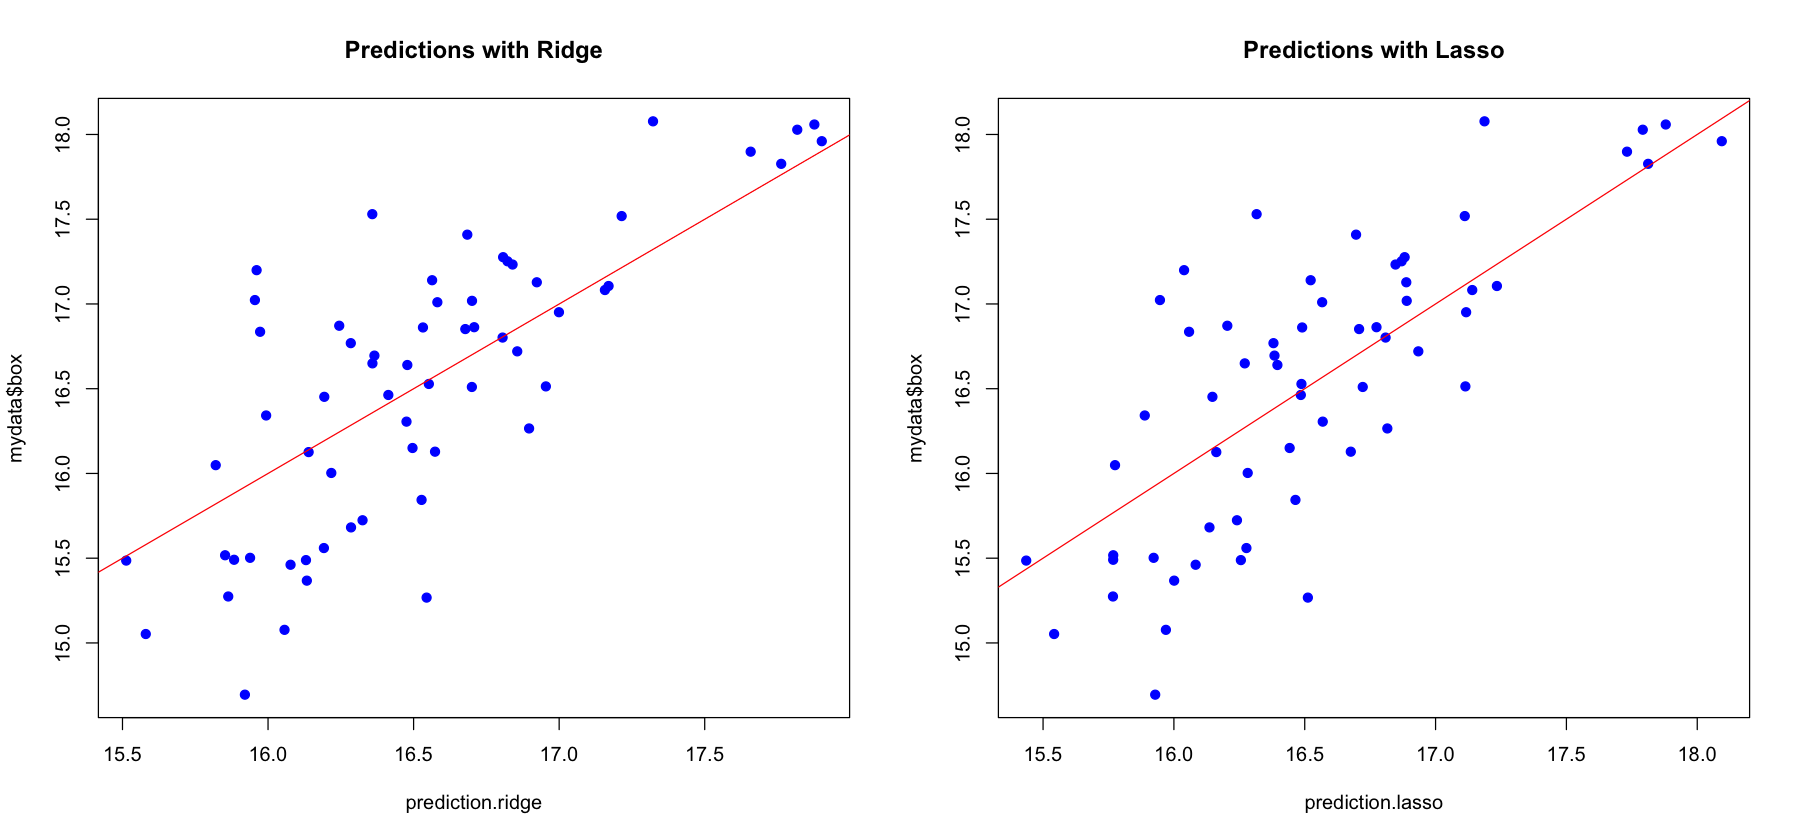

In [94]:
prediction.ridge <- predict(m.ridge.min, newx=X)
prediction.lasso <- predict(m.lasso.min, newx=X)
par(mfrow=c(1,2))
plot(prediction.ridge, mydata$box,
        main='Predictions with Ridge',col="blue",pch=19)
abline(0,1,col="red")
plot(prediction.lasso,mydata$box,
        main='Predictions with Lasso',col="blue",pch=19)
abline(0,1,col="red")

Compare the results with those from the linear model.
We have that :
- MSE for lasso is:0.42
- MSE for linear model is:0.42
 
No Net difference. Since there is  substantial variable selection, lasso is more interesting and we keep it.

### AUTOMATIC SELECTION

#### FORWARD SELECTION

Let's perform forward selection.

In [98]:
library(leaps)
m.forward <- regsubsets(box ~ ., data=mydata, nvmax=17, method='forward')
summary(m.forward )

Subset selection object
Call: regsubsets.formula(box ~ ., data = mydata, nvmax = 17, method = "forward")
14 Variables  (and intercept)
             Forced in Forced out
mprating2        FALSE      FALSE
mprating3        FALSE      FALSE
mprating4        FALSE      FALSE
budget           FALSE      FALSE
starpower        FALSE      FALSE
sequelTRUE       FALSE      FALSE
actionTRUE       FALSE      FALSE
comedyTRUE       FALSE      FALSE
animatedTRUE     FALSE      FALSE
horrorTRUE       FALSE      FALSE
addict           FALSE      FALSE
cmngsoon         FALSE      FALSE
fandango         FALSE      FALSE
cntwait          FALSE      FALSE
1 subsets of each size up to 14
Selection Algorithm: forward
          mprating2 mprating3 mprating4 budget starpower sequelTRUE actionTRUE
1  ( 1 )  " "       " "       " "       " "    " "       " "        " "       
2  ( 1 )  " "       " "       " "       " "    " "       " "        "*"       
3  ( 1 )  " "       " "       " "       " "    " "       

In [99]:
## BIC and RSS

#rss
which.min(summary(m.forward)$rss)


# BIc
which.min(summary(m.forward)$bic)

[1] 14

[1] 3


- the model with the smallest RSS is the model with 14 covariates
- usign BIC instead the best model includes 3 covariates

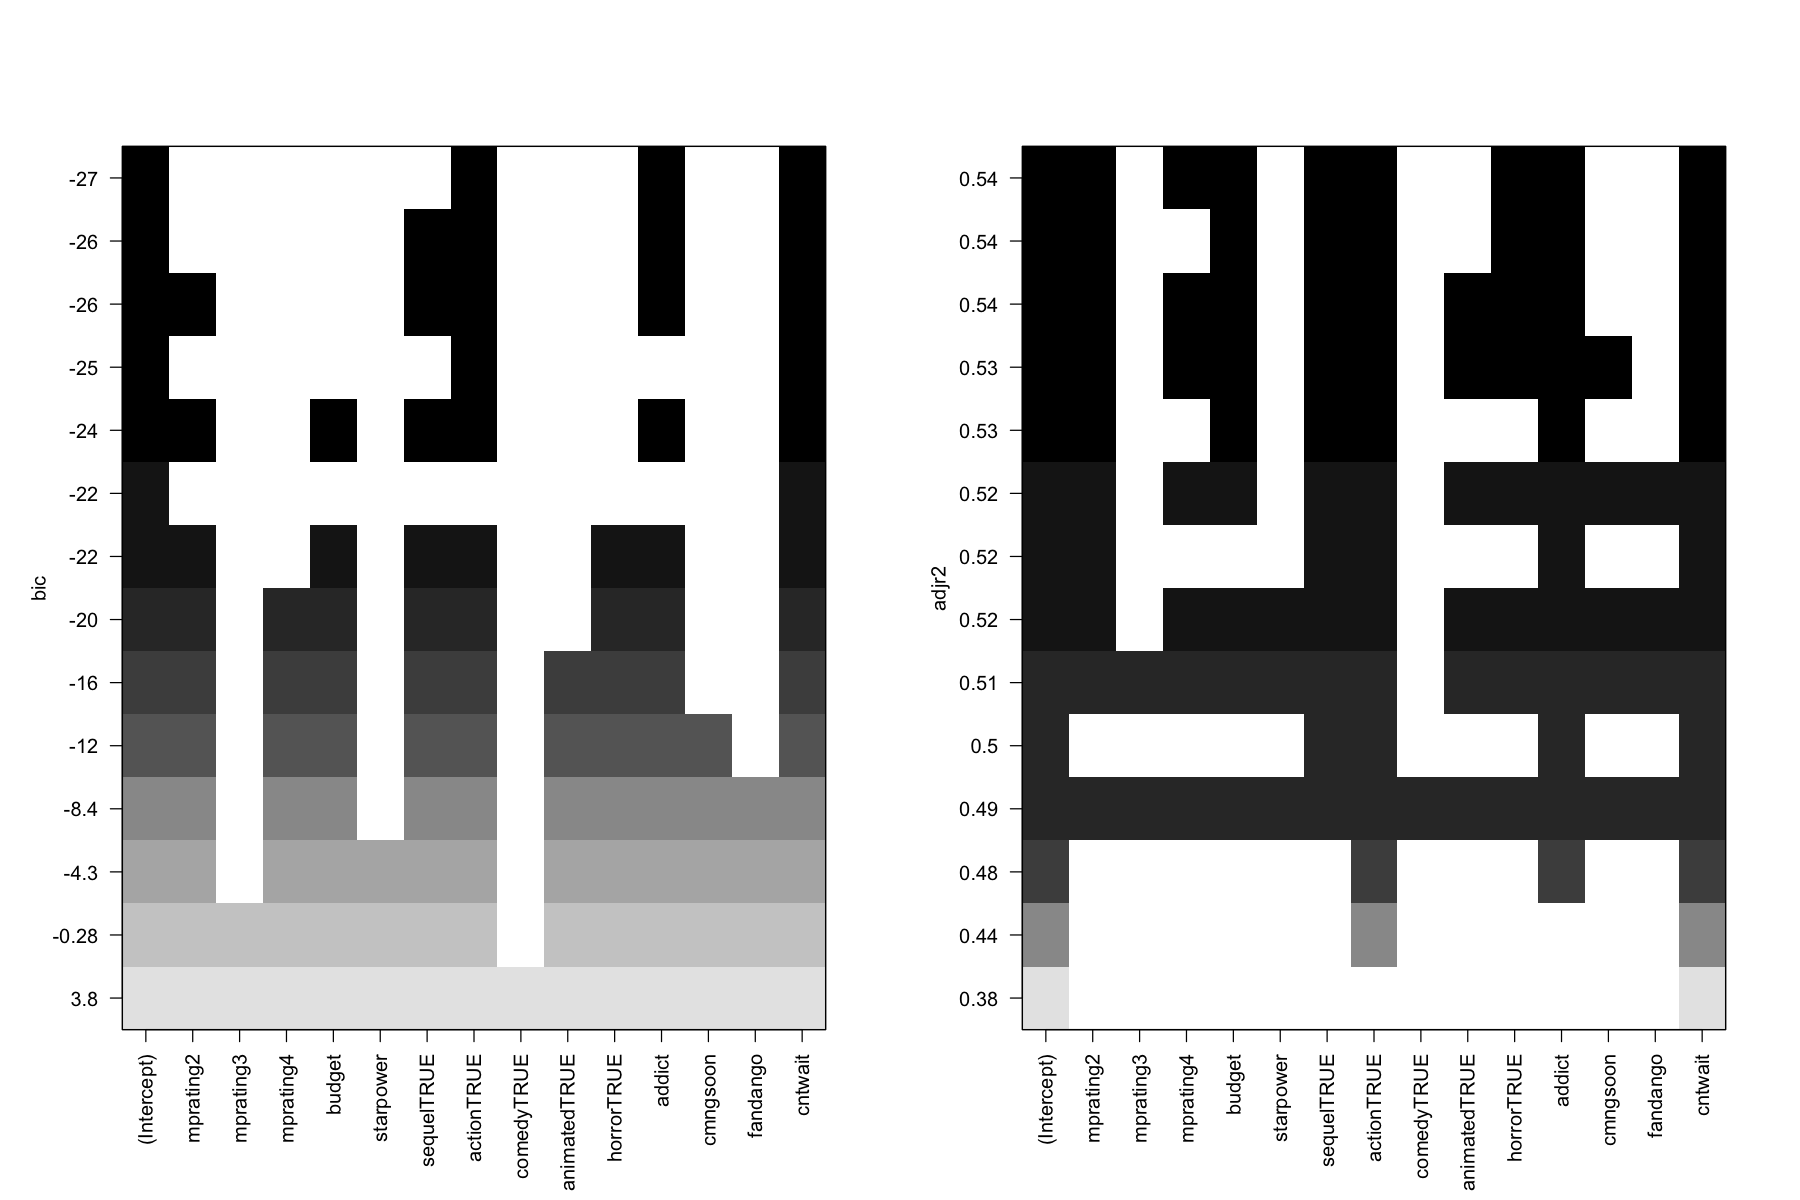

In [100]:
par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(m.forward)
plot(m.forward, scale='adjr2')

we see as computed before that the best model basing on BIC is 3

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 8 for adjr2 and 3 for BIC"

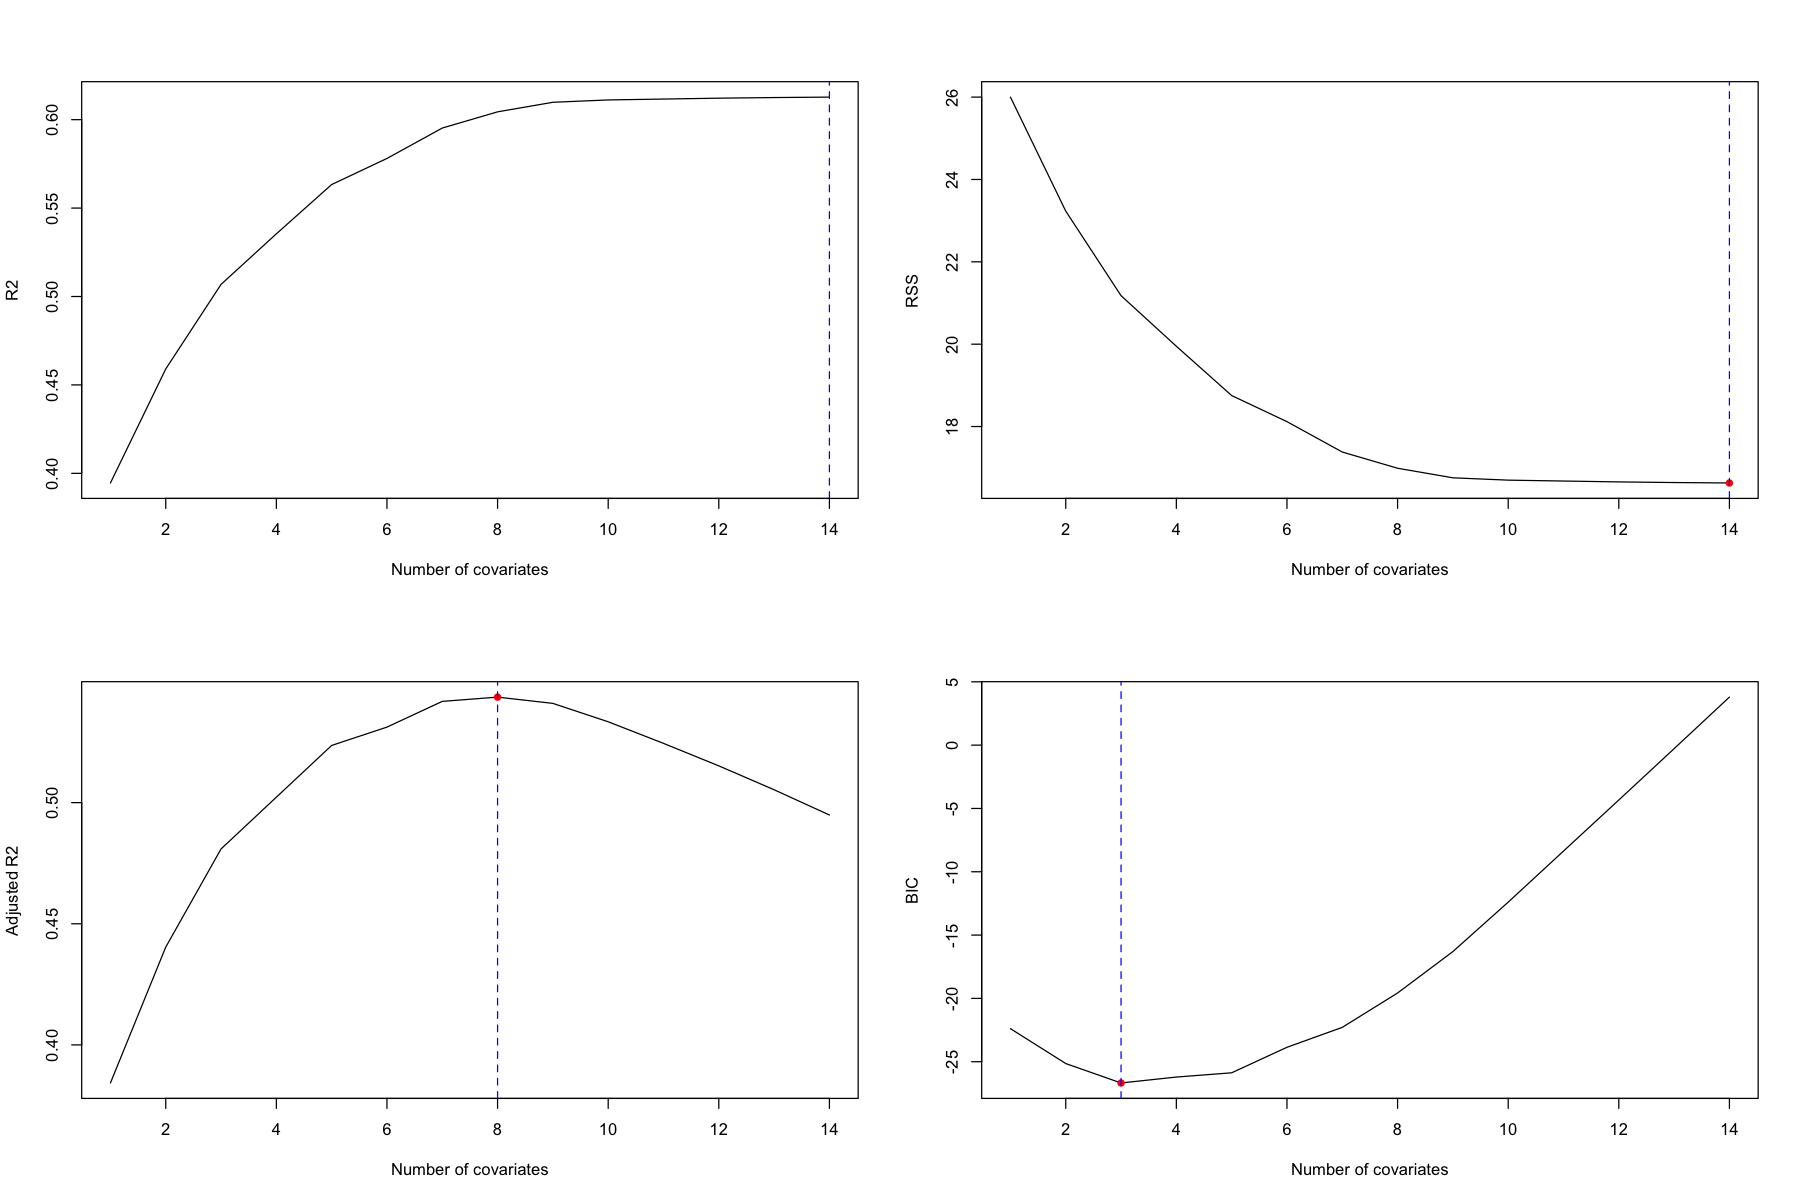

In [101]:
par(mfrow=c(2,2))
## R2
plot(summary(m.forward)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.forward)$rsq)
#points(max.rsq, summary(m.forward)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)


## RSS
plot(summary(m.forward)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.forward)$rss)
points(min.rss, summary(m.forward)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
plot(summary(m.forward)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.forward)$adjr2)
points(max.adjr2, summary(m.forward)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)


## BIC
plot(summary(m.forward)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.forward)$bic)
points(min.bic, summary(m.forward)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 

base on BIC we keep the model with the lowest BIC so with a number of covariates equal to : 3


Call:
lm(formula = box ~ action + addict + cntwait, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32437 -0.34675 -0.00036  0.38525  1.51818 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.476e+01  2.747e-01  53.732  < 2e-16 ***
actionTRUE  -5.834e-01  2.043e-01  -2.855  0.00599 ** 
addict       2.644e-05  1.125e-05   2.351  0.02220 *  
cntwait      3.592e+00  6.080e-01   5.908 2.03e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6095 on 57 degrees of freedom
Multiple R-squared:  0.5068,	Adjusted R-squared:  0.4809 
F-statistic: 19.53 on 3 and 57 DF,  p-value: 7.855e-09


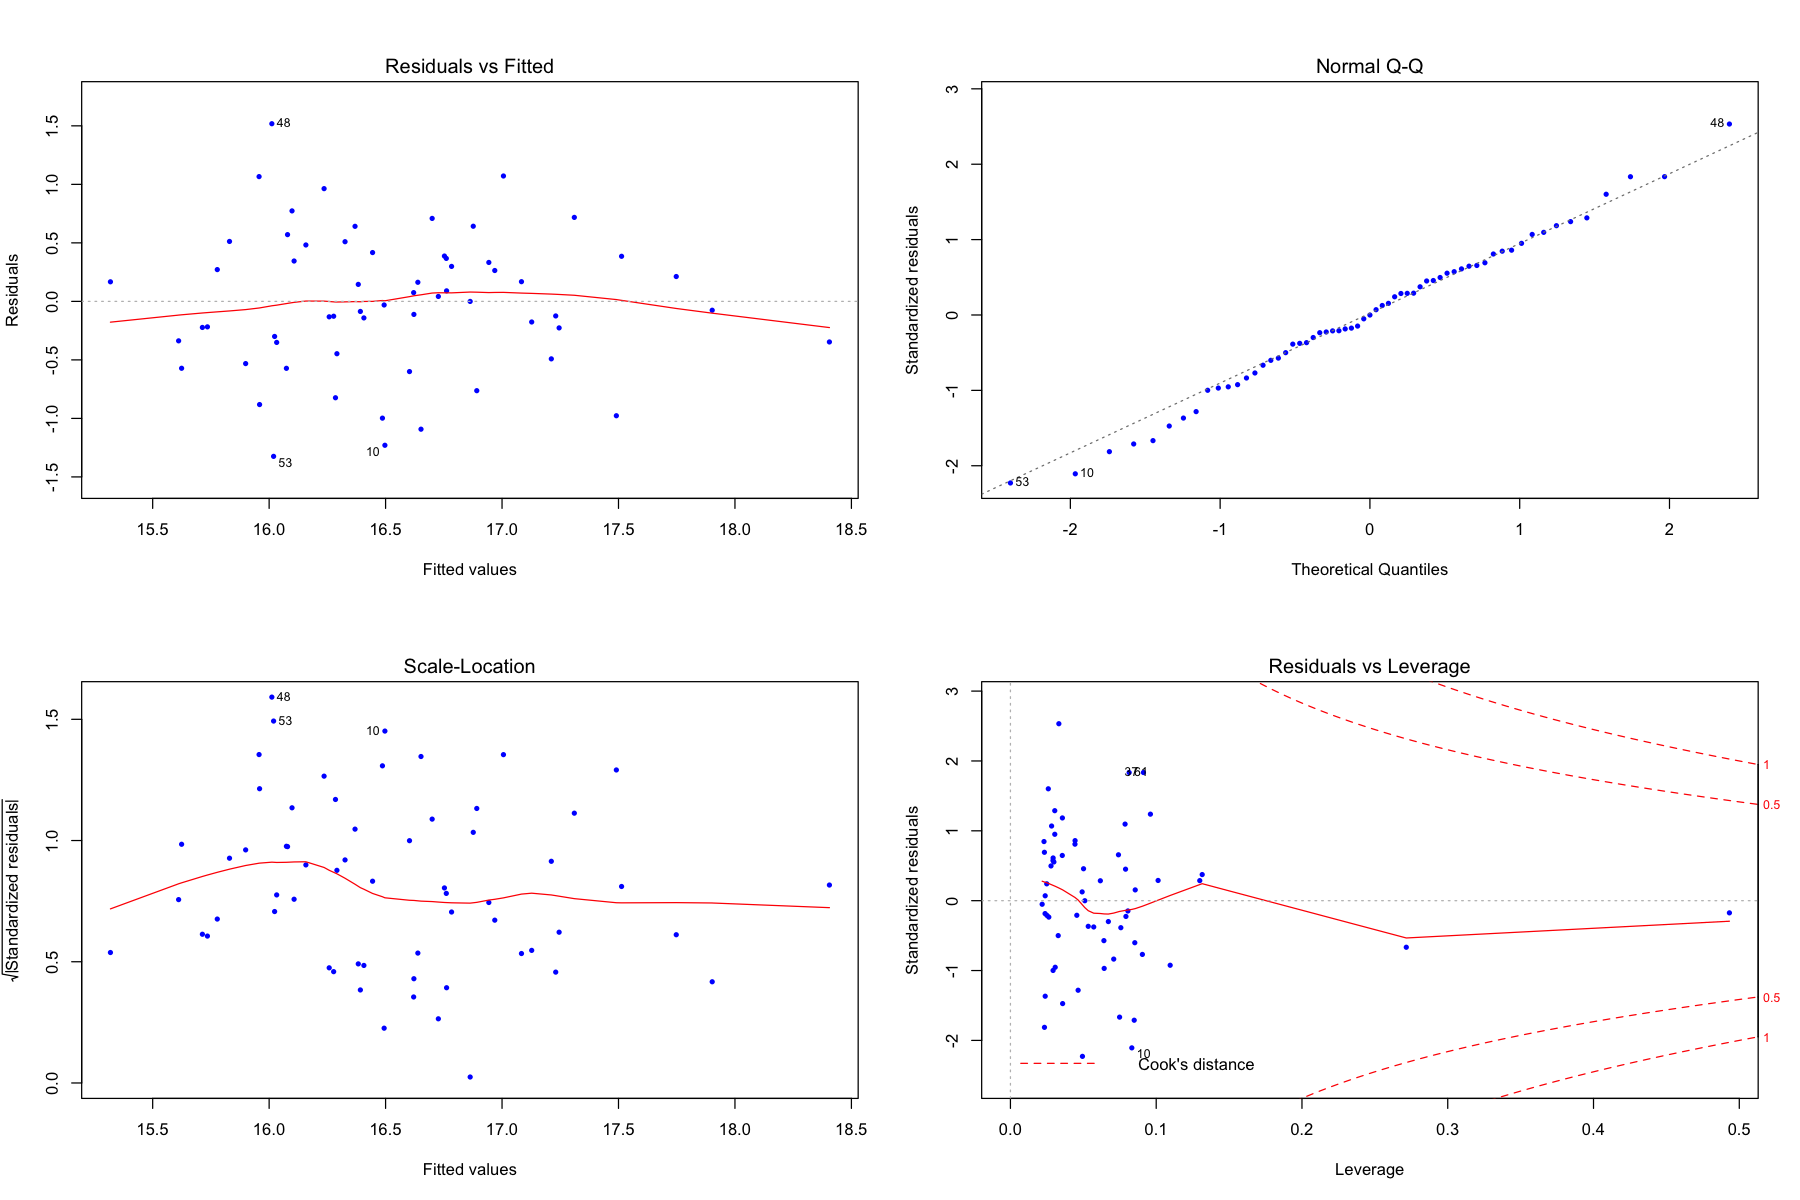

In [105]:
model.bic <- lm(box ~ action+addict+cntwait, data=mydata)
summary(model.bic)
par(mfrow=c(2,2))
plot(model.bic, pch=16, cex=0.7,col="blue")

Now we can judge also our model considering the residuals. 
The graph of residuals indicates that the model does  have a good fit. In fact, the first graph (scatter plot of the residuals) doesn't show a deterministic pattern . In addition, the mean of the residuals does appear to be 0 and the variance of the residuals does  appear to be constant, as it should be based on the assumptions that the regression model places on the ε errors. Furthermore, the normality of the residuals is  satisfied  as highlighted in the second graph: the empirical quantiles in the tails , in fact, don't deviate from the theoretical quantiles of a standard normal.
To complete the analysis of the residuals, no outliers appear to be present: although R highlights observations, these do not represent outlier observations since Cook's distance is not large. 

We also have that the MSE is:0.59

In [106]:
## FORWARD MSE
m.glm <- lm(box ~ action + addict + cntwait, data=mydata)
p.mglm=predict(m.glm,newdata=mydata)
rmse <- sqrt(mean((mydata$box - p.mglm)^2))
rmse 

[1] 0.5892184

### BACKWORD SELECTION

Let's perform backword selection.

(Intercept)     mprating2     mprating4        budget    sequelTRUE 
 1.493206e+01  3.301270e-01 -1.991083e-01  4.148859e-03  4.523488e-01 
   actionTRUE  animatedTRUE    horrorTRUE        addict       cntwait 
-6.014437e-01 -2.758562e-01  4.200119e-01  2.970459e-05  2.531897e+00

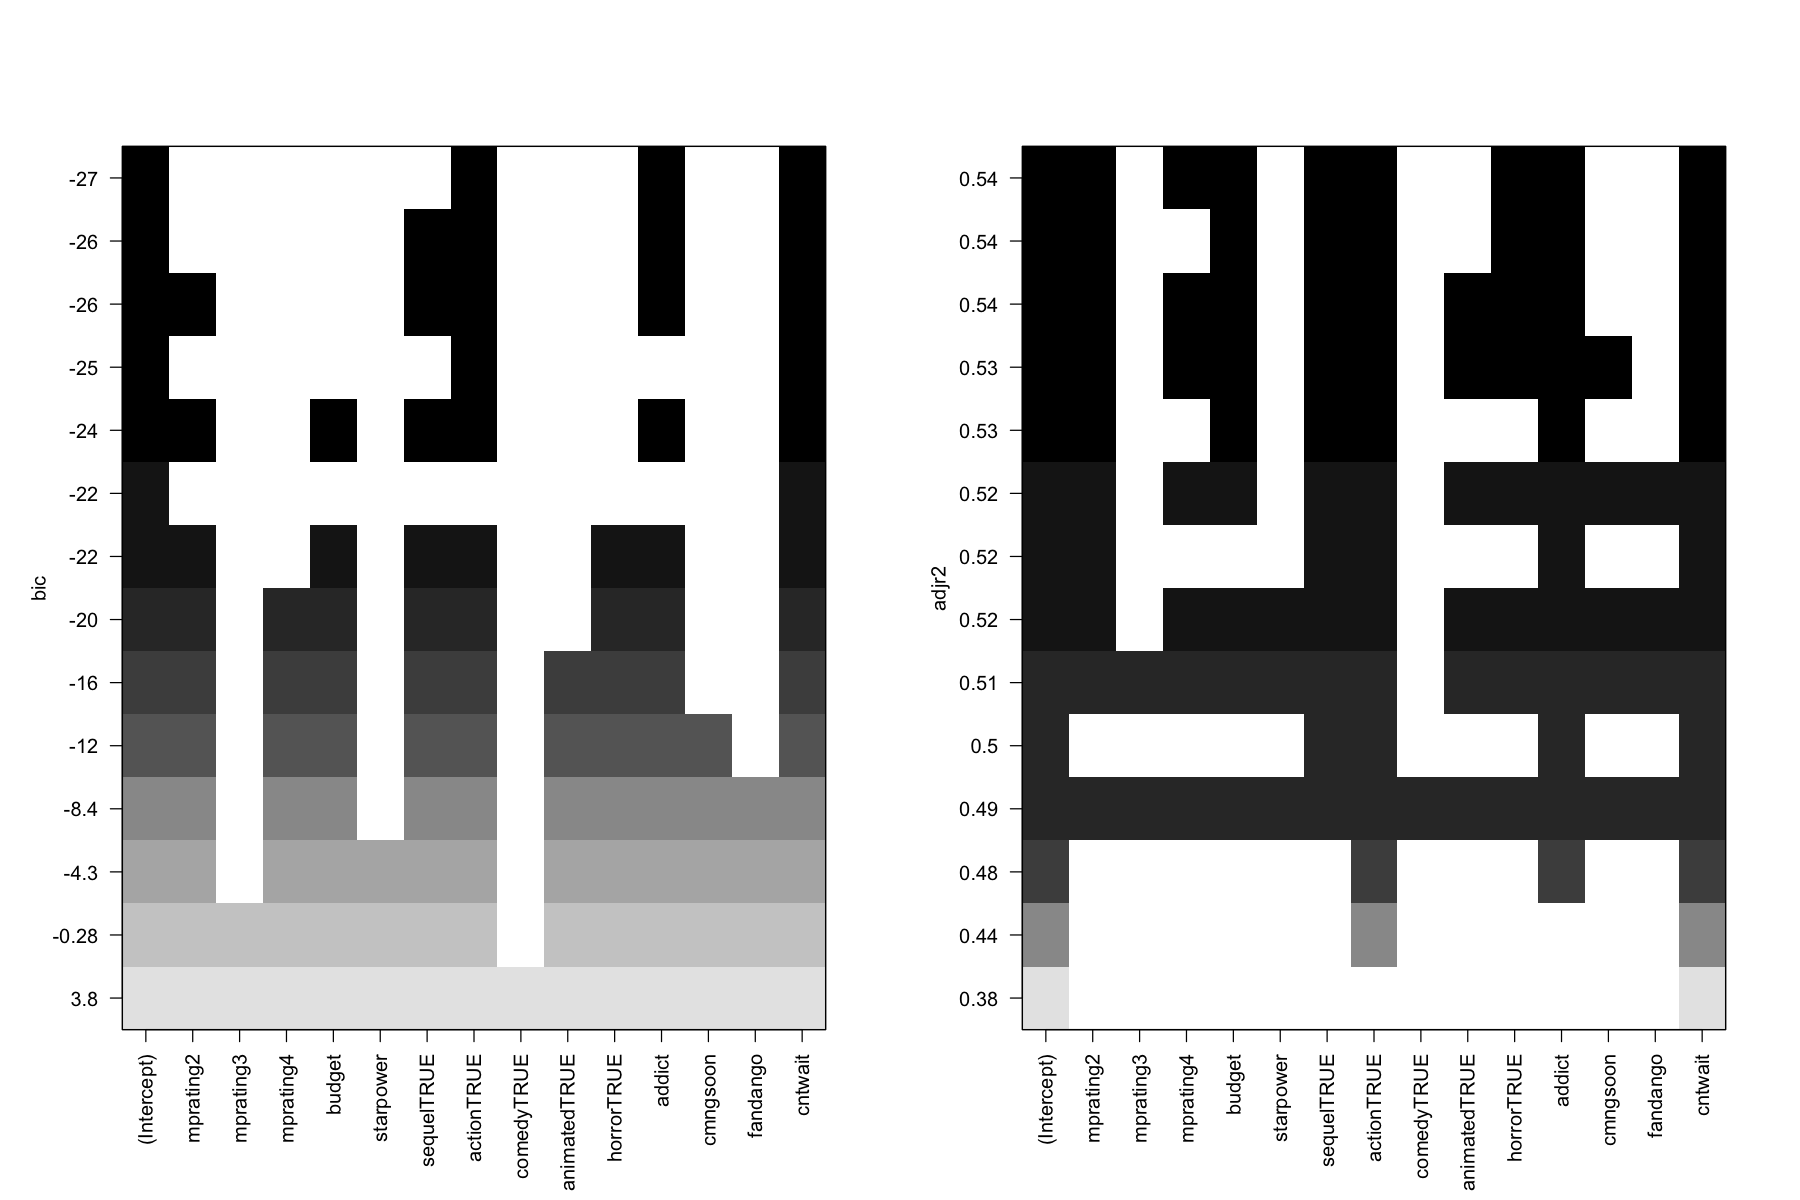

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 8 for adjr2 and 3 for BIC"

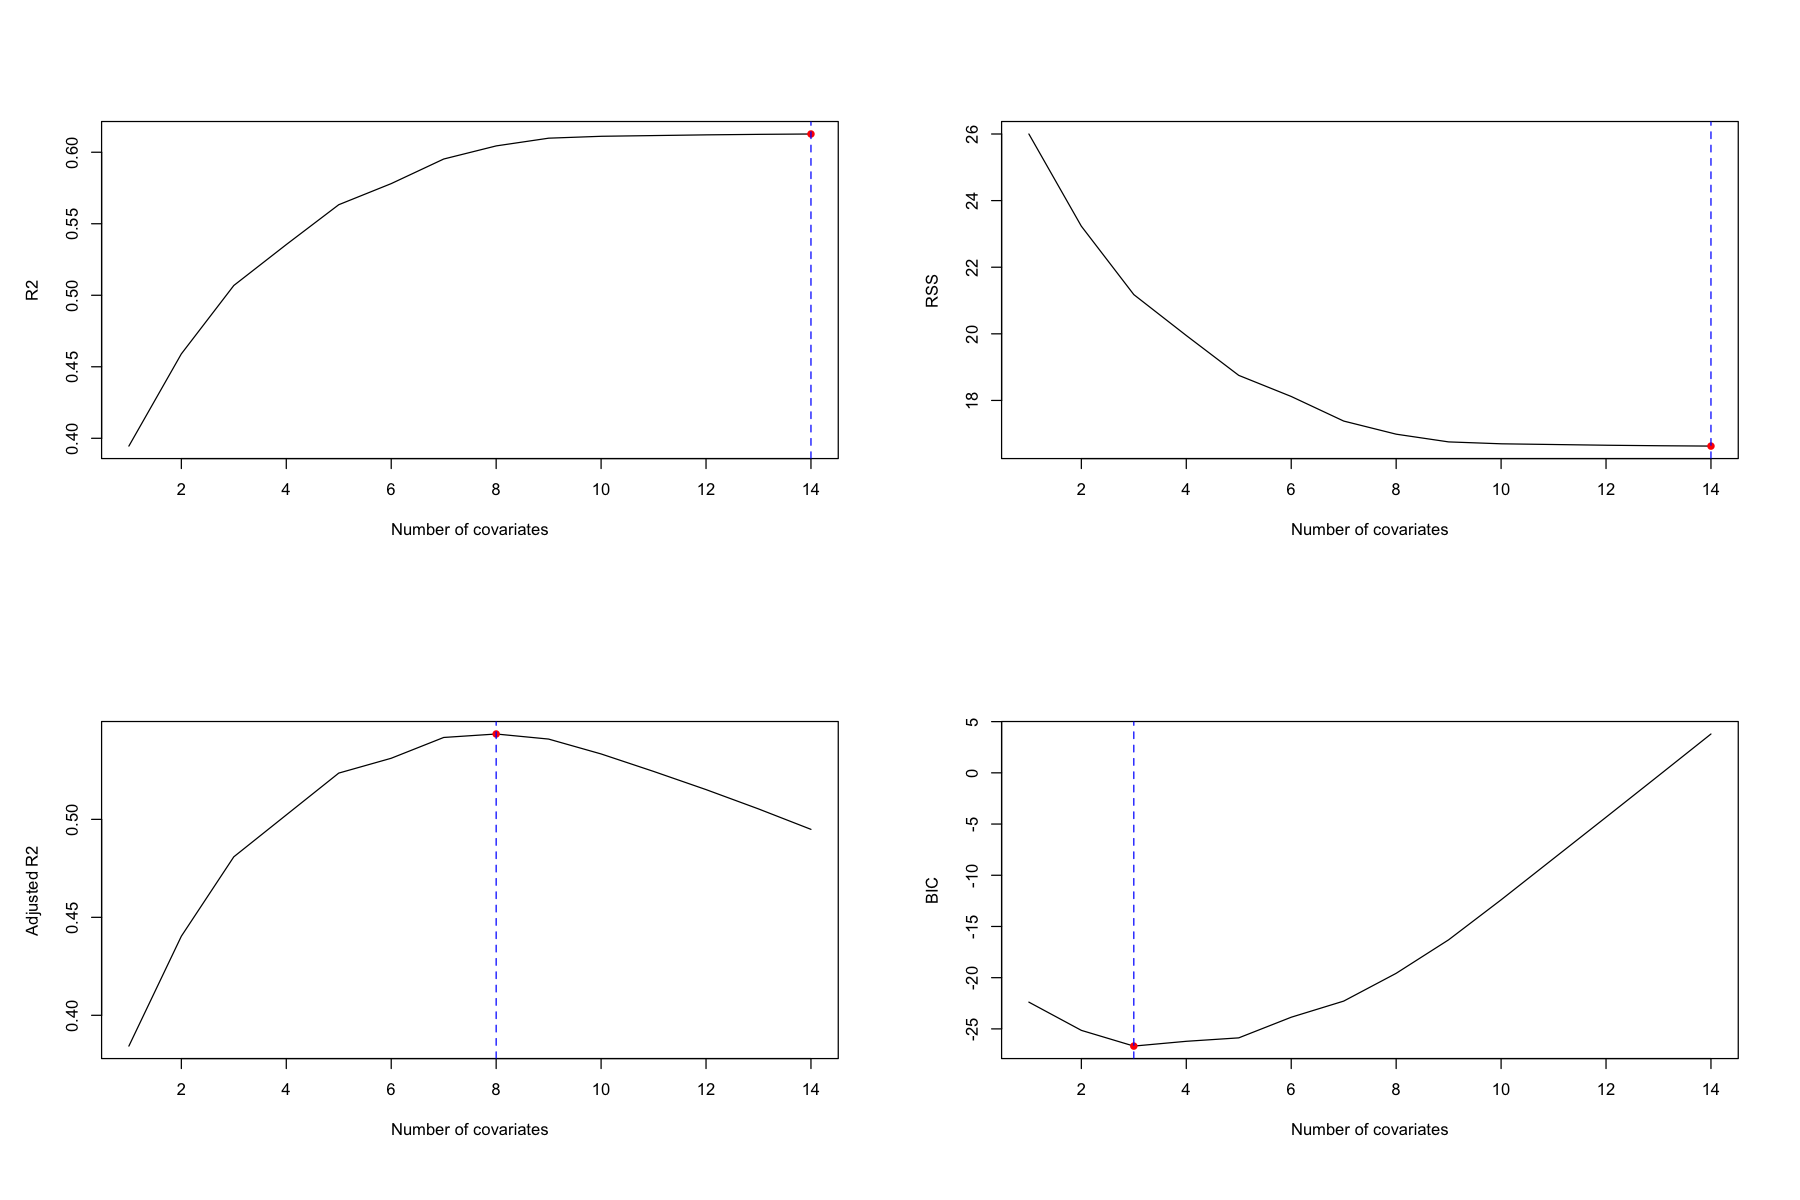

In [107]:
m.backward <- regsubsets(box ~ ., data=mydata, nvmax=17, method='backward')
#plot(m.backward)

coef(m.backward,9 )

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(m.backward)
plot(m.backward, scale='adjr2')
par(mfrow=c(2,2))
## R2
plot(summary(m.backward)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.backward)$rsq)
points(max.rsq, summary(m.backward)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)


## RSS
plot(summary(m.backward)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.backward)$rss)
points(min.rss, summary(m.backward)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
plot(summary(m.backward)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.backward)$adjr2)
points(max.adjr2, summary(m.backward)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)


## BIC
plot(summary(m.backward)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.backward)$bic)
points(min.bic, summary(m.backward)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 

As you can see, forward and backward give us the same amount of covariates based on BIC. In fact in this case we have 3 covariates and the MSE is again 0.59 .

### MIXED SELECTION

Let's perform mixed selection.

(Intercept)     mprating2     mprating4        budget    sequelTRUE 
 1.493206e+01  3.301270e-01 -1.991083e-01  4.148859e-03  4.523488e-01 
   actionTRUE  animatedTRUE    horrorTRUE        addict       cntwait 
-6.014437e-01 -2.758562e-01  4.200119e-01  2.970459e-05  2.531897e+00

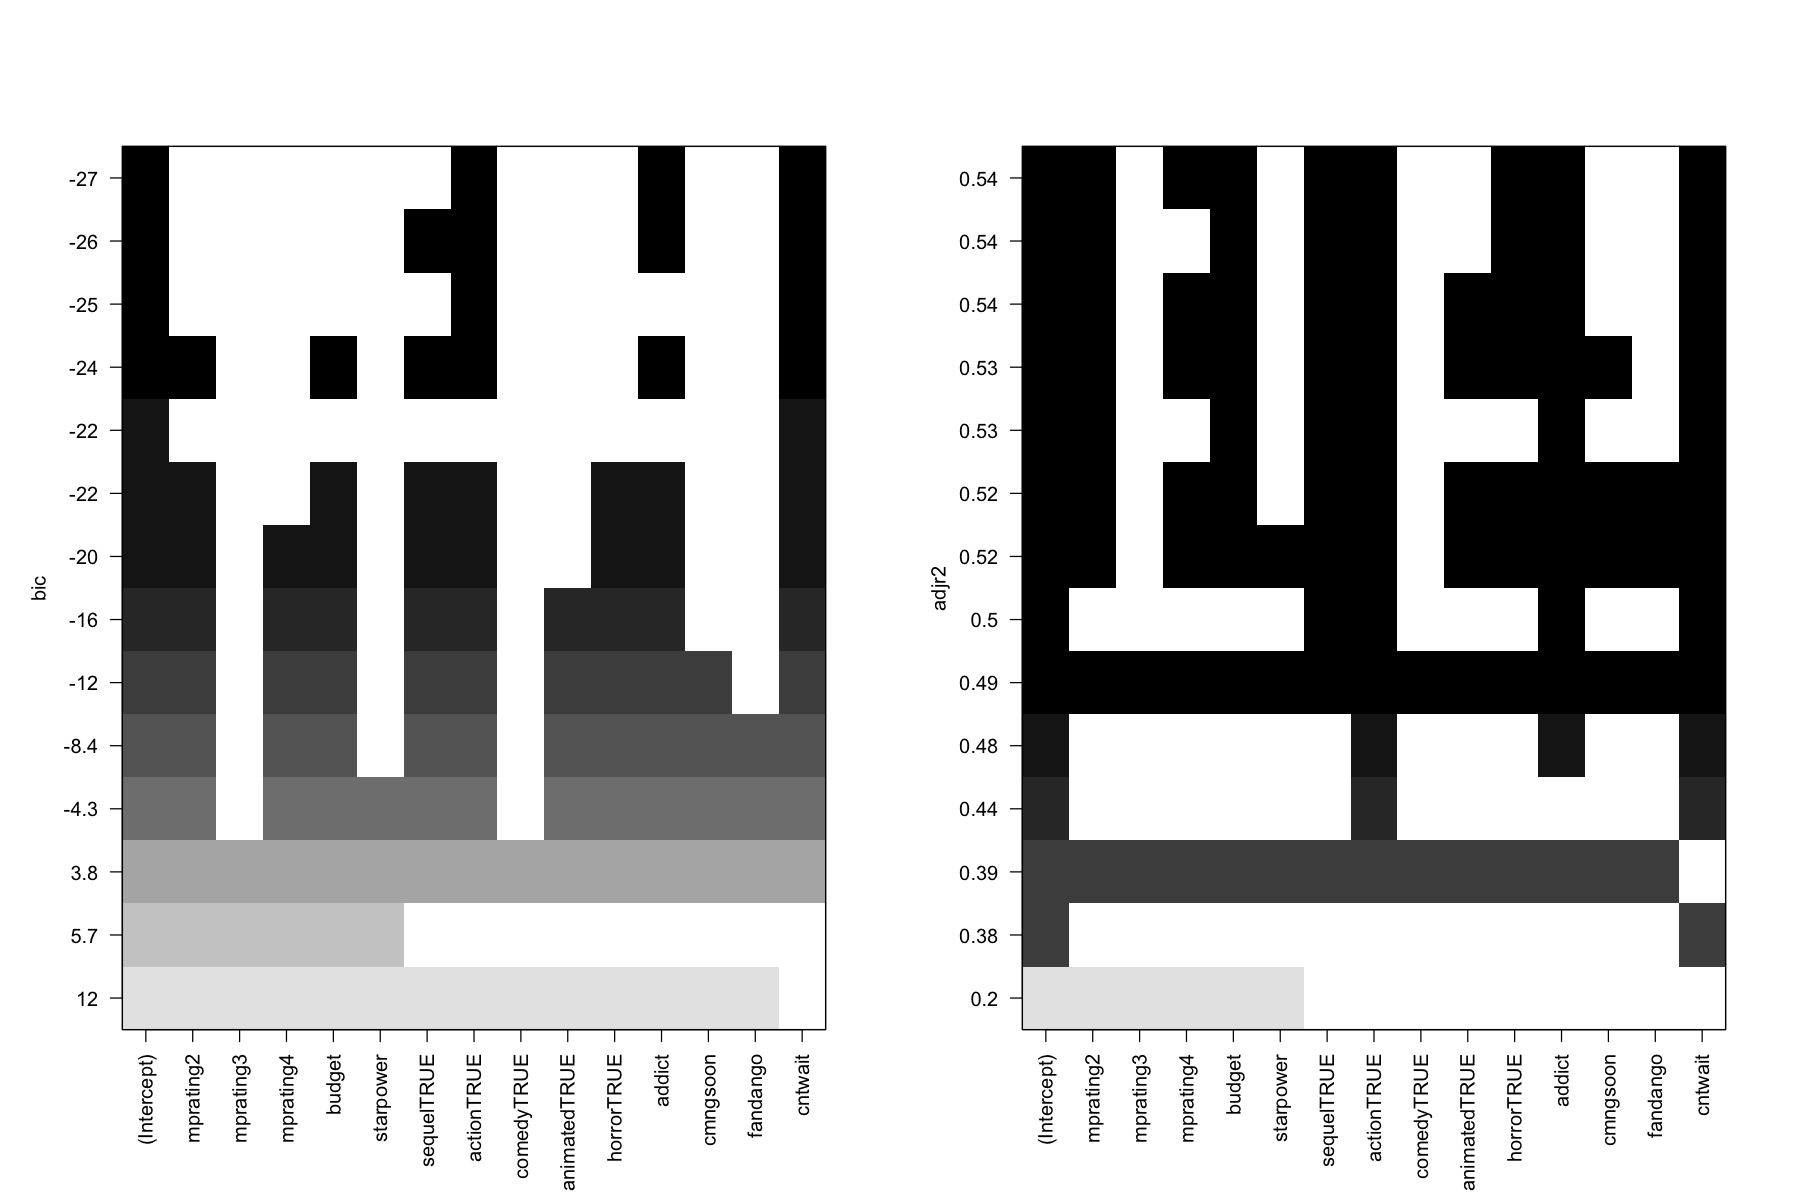

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 8 for adjr2 and 3 for BIC"

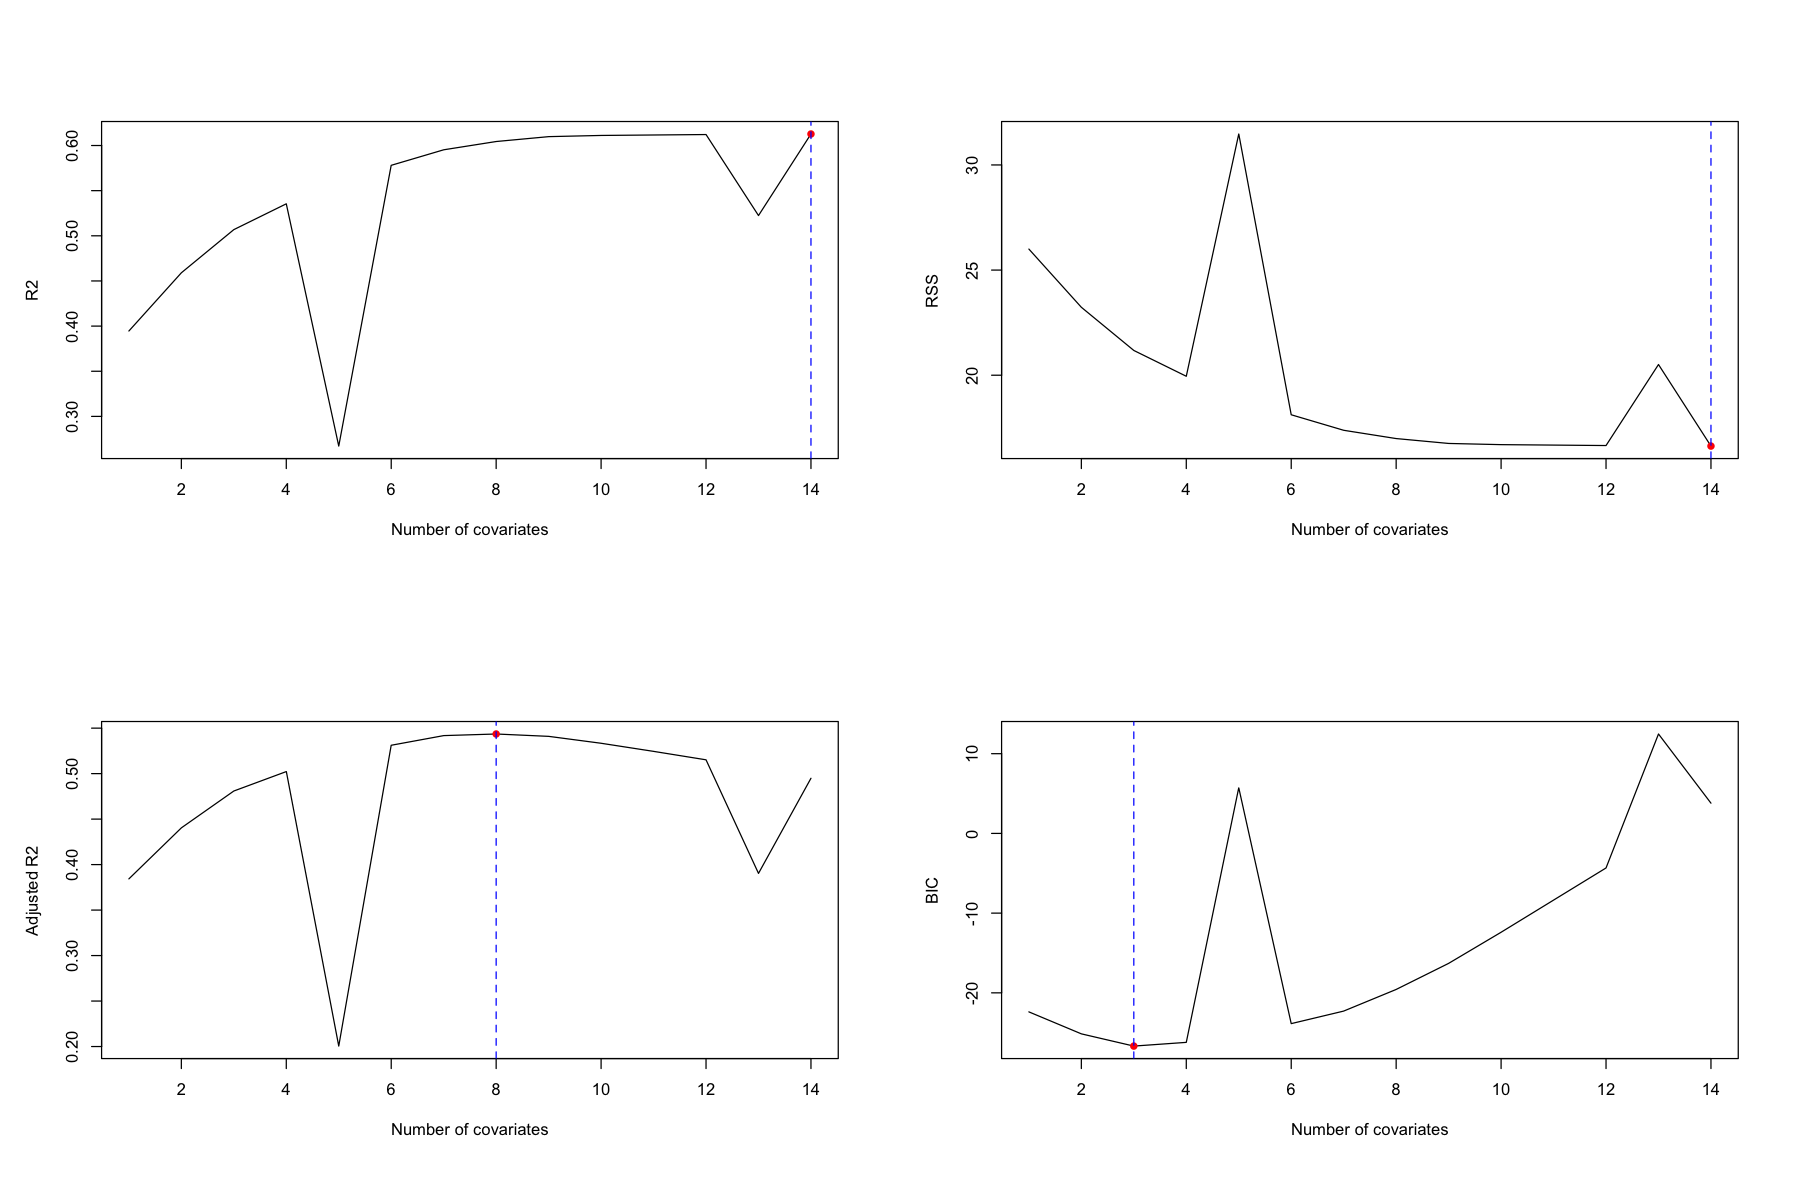

In [108]:
m.seqrep <- regsubsets(box ~ ., data=mydata, nvmax=17, method='seqrep')

coef(m.seqrep,9 )

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(m.seqrep)
plot(m.seqrep, scale='adjr2')

par(mfrow=c(2,2))
## R2
plot(summary(m.seqrep)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.seqrep)$rsq)
points(max.rsq, summary(m.seqrep)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)


## RSS
plot(summary(m.seqrep)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.seqrep)$rss)
points(min.rss, summary(m.seqrep)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
plot(summary(m.seqrep)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.seqrep)$adjr2)
points(max.adjr2, summary(m.seqrep)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)


## BIC
plot(summary(m.seqrep)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.seqrep)$bic)
points(min.bic, summary(m.seqrep)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 


As you can see, forward ,backward and mixed selection give us the same amount of covariates based on BIC. In fact in this case we have 3 covariates and the MSE is again 0.59 .

### PRINCIPAL COMPONENT ANALYSIS
Let's consider Principal component analysis in order to see if it is useful.
I set the seed at 222.

In [109]:
## PCA
library(pls)
set.seed(222)
m.pcr <- pcr(box ~ ., scale=TRUE, validation='CV', data=mydata)
summary(m.pcr)


Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



Data: 	X dimension: 61 14 
	Y dimension: 61 1
Fit method: svdpc
Number of components considered: 14

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           0.853   0.7192   0.7116   0.7087   0.7214   0.7276   0.6576
adjCV        0.853   0.7175   0.7101   0.7070   0.7194   0.7321   0.6517
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.6563   0.6249   0.6211    0.6408    0.6493    0.6557     0.652
adjCV   0.6582   0.6184   0.6155    0.6355    0.6446    0.6498     0.645
       14 comps
CV       0.6706
adjCV    0.6624

TRAINING: % variance explained
     1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      24.46    42.85    55.35    64.45    71.92    78.49    83.74    88.35
box    30.99    33.54    35.48    37.01    37.01    50.74    52.57    57.45
     9 comps  10 comps  11 comps  12 comps  13 comps  14 comps
X      91.61     94.56     96.

The output provides the result of the cross validation in terms of square root of the MSE for each number of PCs. -Choose the optimum through a graphical inspection of the results considering MSE and $R^{2}$.
We see that the  number of PCs needed is:  14
While the best number of components we can use for the analysis based on R comand SelectNcompo is : 2
We also have that the value of MSE is reported below.

In [111]:
MSEP(m.pcr, ncomp=selectNcomp(m.pcr, method='onesigma', ncomp=14))

       (Intercept)  2 comps
CV          0.7276   0.5064
adjCV       0.7276   0.5043

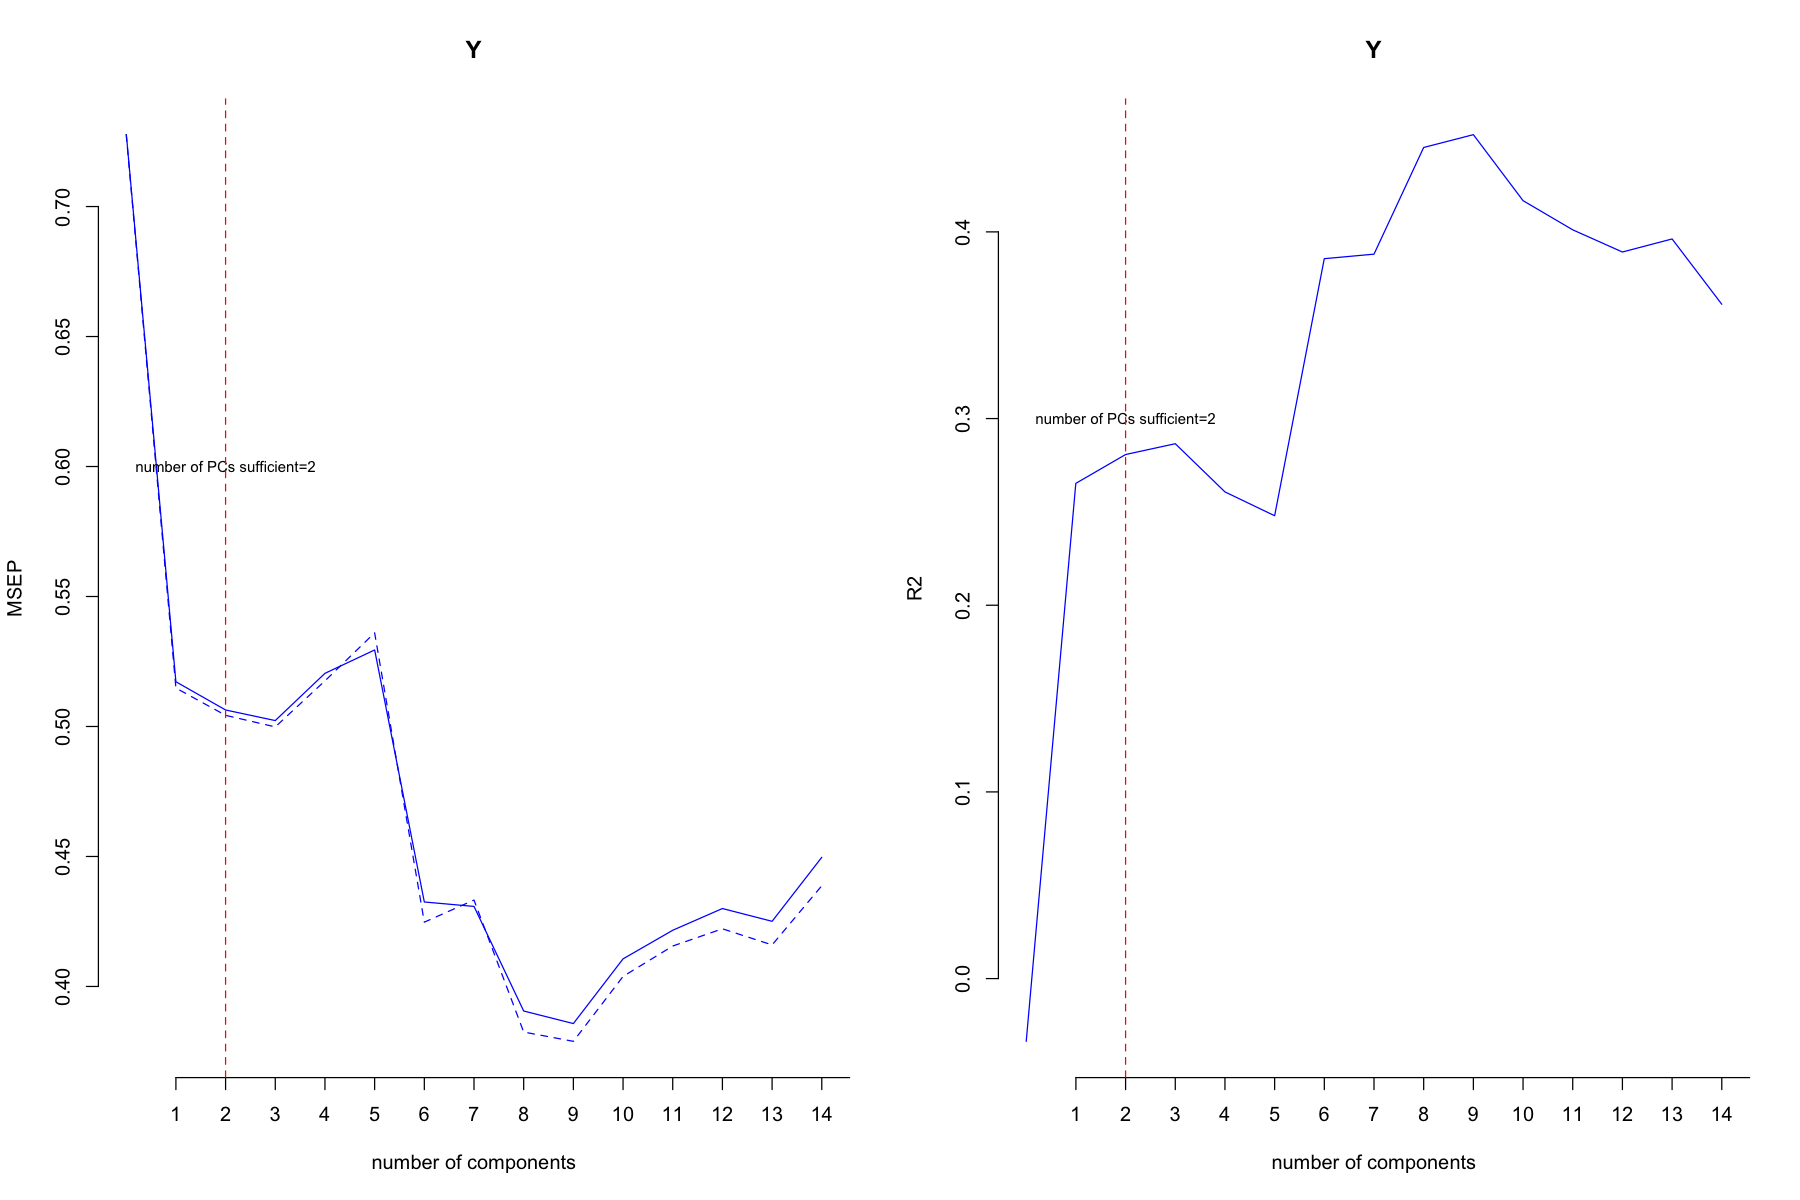

In [114]:
par(mfrow=c(1,2))
## graph without axes

validationplot(m.pcr, val.type='MSEP', main='Y', axes=FALSE, col="blue")
## add on the x-axis (1) with the specification (at) of the points at which tick-mar ## are to be drawn
axis(1, at=1:16)
## add on the y-axis
axis(2)
text(x=selectNcomp(m.pcr, method='onesigma', ncomp=12), y=0.6,cex=0.75,paste0("number of PCs sufficient=", selectNcomp(m.pcr, method='onesigma', ncomp=20)))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=12), col="red",lt=2)

validationplot(m.pcr, val.type='R2', main='Y', axes=FALSE,col="blue")
axis(1, at=1:16)
axis(2)
text(x=selectNcomp(m.pcr, method='onesigma', ncomp=16), y=0.3,cex=0.75,paste0("number of PCs sufficient=", selectNcomp(m.pcr, method='onesigma', ncomp=20)))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=16), col="red",lt=2)

Let's look how much variance is explained by the 14 components in the plot below.
While te explained variance for our 2 PCs obtained before is 43% that is a bit low. So we will also consider 11 components that are the same number obtained by lasso which lead to 94% of explained deviance.

Comp 1     Comp 2     Comp 3     Comp 4     Comp 5     Comp 6     Comp 7 
24.4608911 18.3929011 12.4991912  9.1018520  7.4665810  6.5661647  5.2491688 
    Comp 8     Comp 9    Comp 10    Comp 11    Comp 12    Comp 13    Comp 14 
 4.6087898  3.2615186  2.9575590  2.0912711  1.7665661  1.2908614  0.2866842

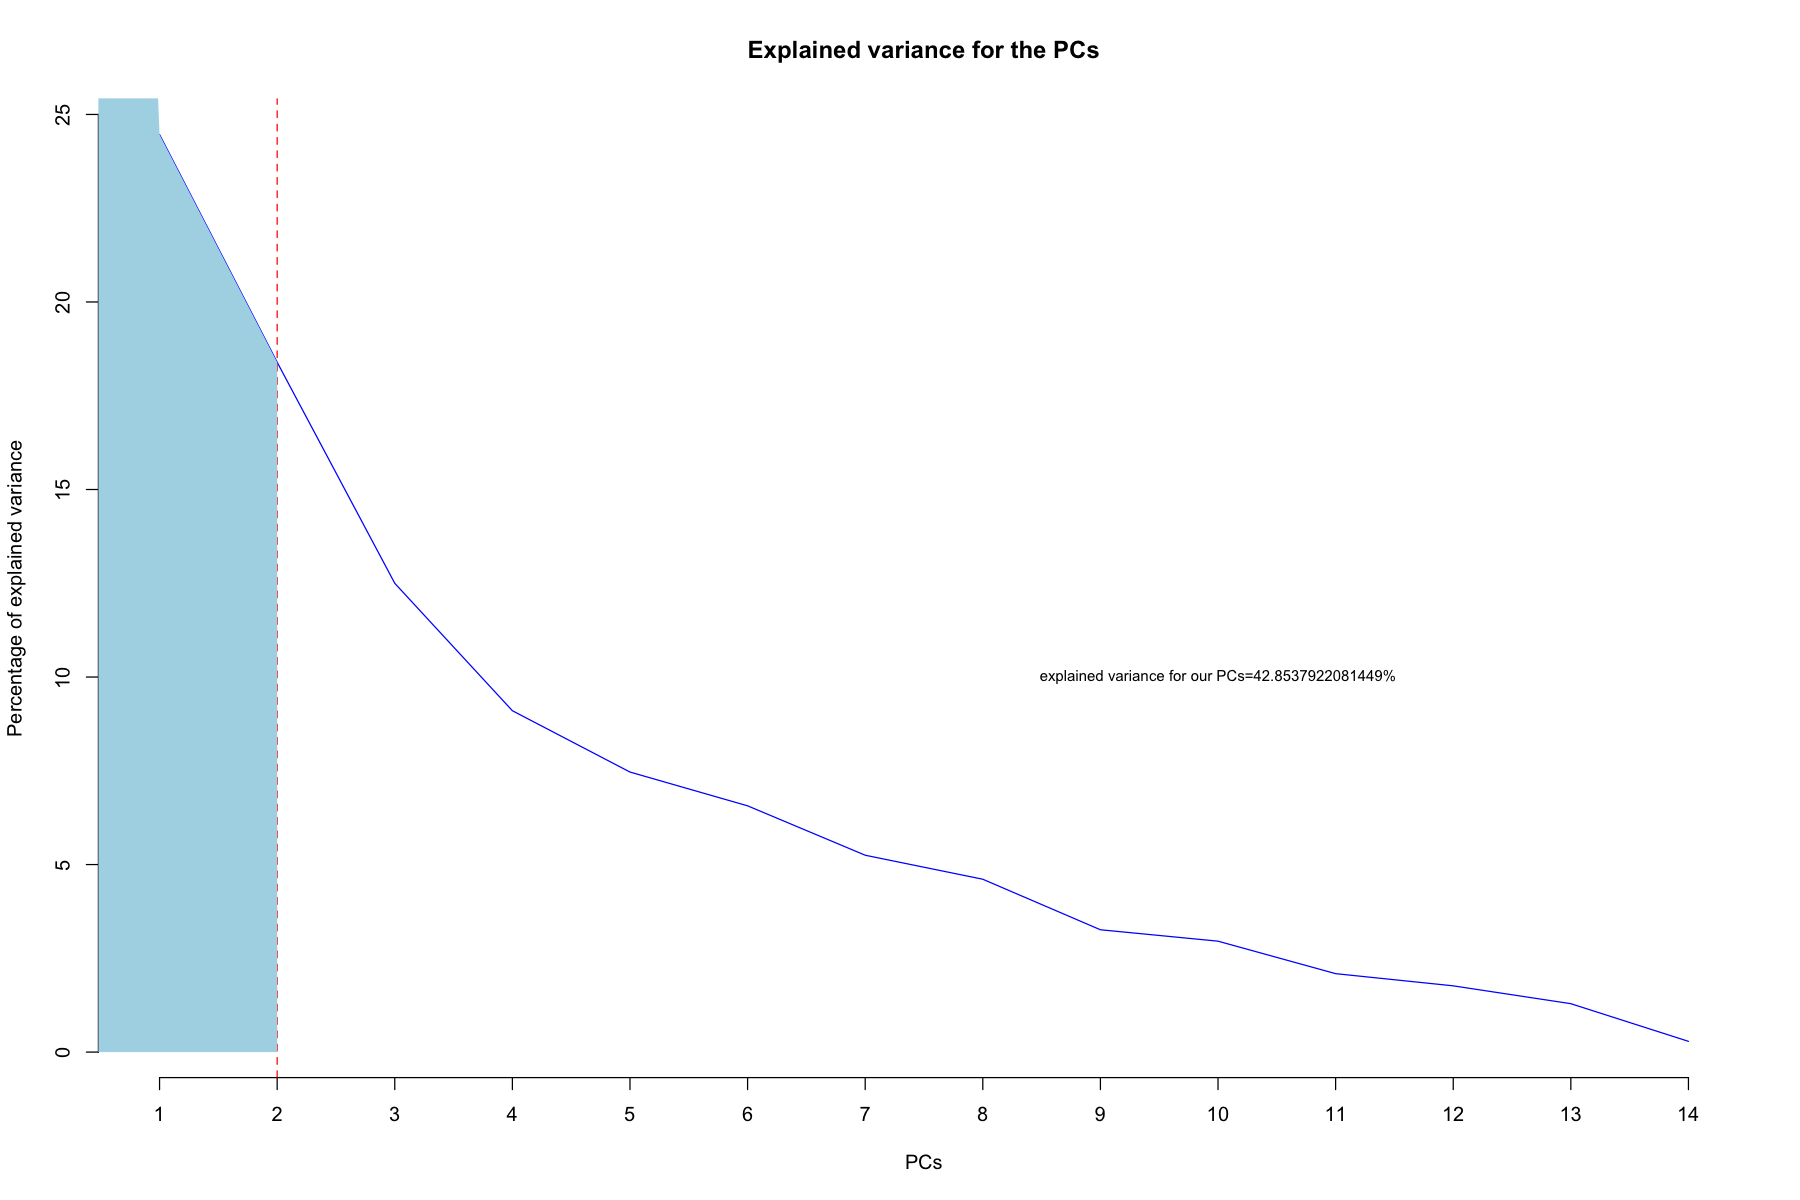

In [118]:
## explained variance
explvar(m.pcr)
sum=sum(explvar(m.pcr)[1:selectNcomp(m.pcr, method='onesigma', ncomp=14)])

## plot:

plot(1:14, explvar(m.pcr), ylab='Percentage of explained variance',
        xlab='PCs', type='l', axes=FALSE,col="blue",main="Explained variance for the PCs")
axis(1, at=1:14)
axis(2)
text(x=10, y=10,cex=0.75,paste0("explained variance for our PCs=",sum,"%"))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=14), col="red",lt=2)



x2 = c(0,0,1:2,2)
y2 = c(0,100,explvar(m.pcr)[1:selectNcomp(m.pcr, method='onesigma', ncomp=14)],0)
polygon(x2,y2, col="lightblue", border=NA)

Let's now  plot Plot the regression coefficients associated to the models with increasing PCs, from 1 to 11
We see that we have our 11 models. We look for the picks. As picks are higher as our model is better. The model with 11 comps give us the largest amount of informations (it is the better one).

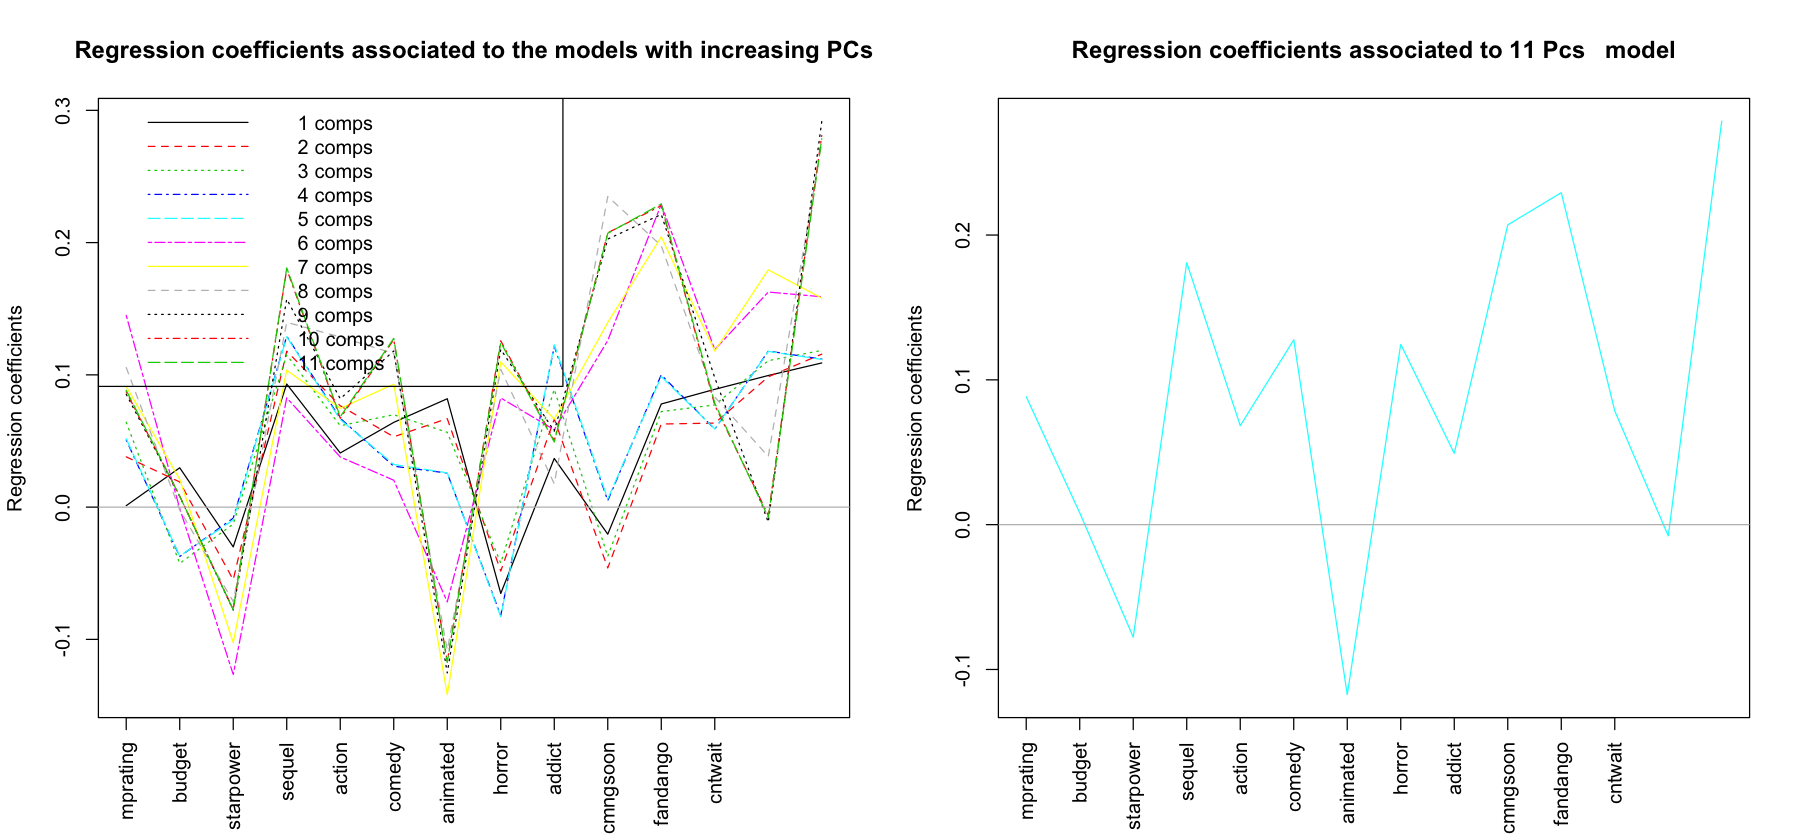

In [125]:
#plot

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 7)
coefplot(m.pcr, ncomp=1:11, legendpos='topleft', main='',
        xlab='', ylab='Regression coefficients',xaxt="n")
axis(1, at=1:12, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)
title("Regression coefficients associated to the models with increasing PCs")

coefplot(m.pcr, ncomp=11, main='', xlab='',,xaxt="n", ylab='Regression coefficients',col="cyan")
title("Regression coefficients associated to 11 Pcs   model")
axis(1, at=1:12, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)

Let's evaluate the presence of of groups of observations or outliers through the scores. We do not see a kind of trend in the groups. So PCA is satisfactory.

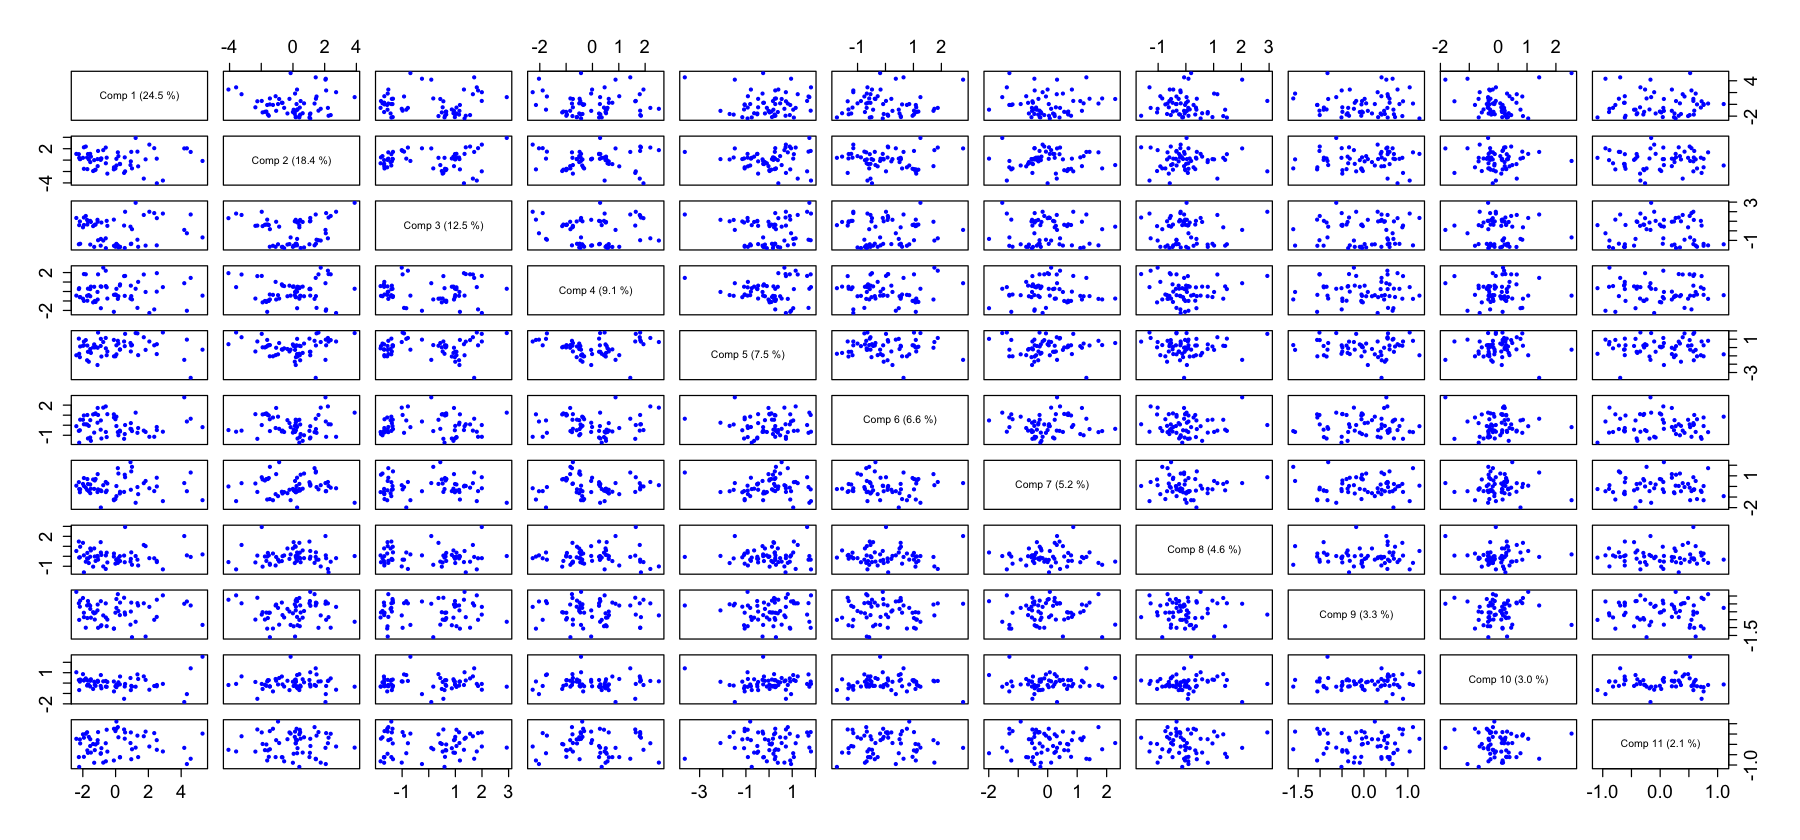

In [127]:
scoreplot(m.pcr, comps=1:11, cex=0.5, cex.lab=1.4, cex.axis=1.4, pch=19,col="blue")

Finally, evaluate the predictions from the model.
Values around the bisector does suggest a good behavior of the model.

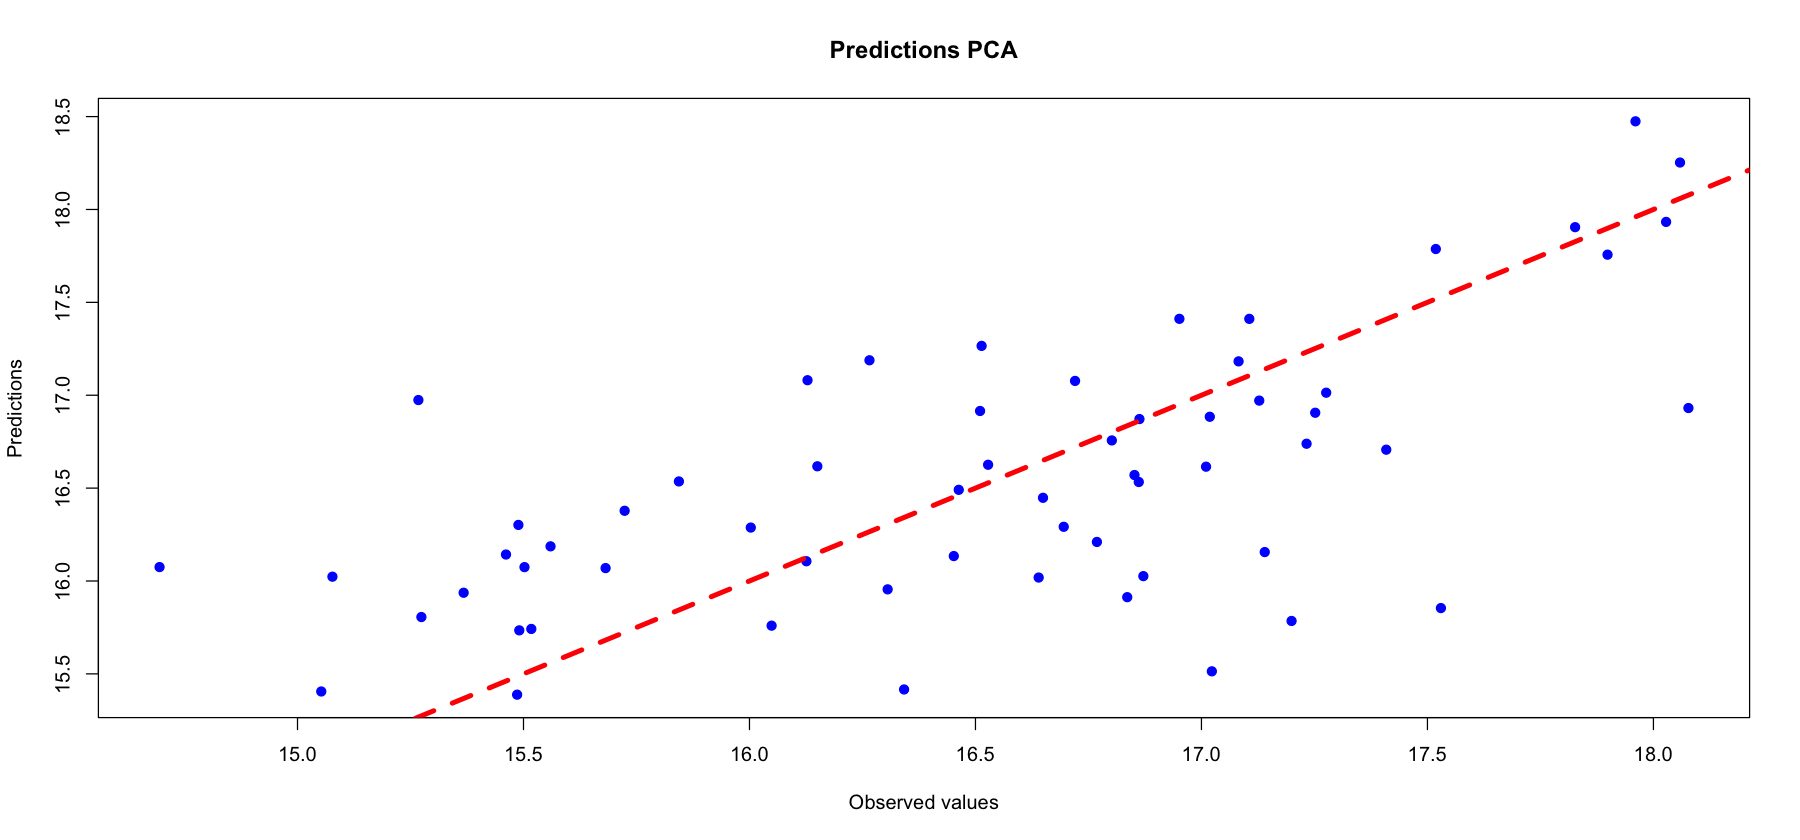

In [131]:
# plot predizione
plot(m.pcr, xlab='Observed values', ylab='Predictions',
        main='Predictions PCA',col="blue",pch=19)
abline(0, 1, col="red",lt=2,lwd=4)

Finally the MSE of PCA is 0.42.

## Conclusion Point 2

From The analysis of al dataset we have that :
- MSE for lasso is:0.42
- MSE for linear model is:0.42
- MSE for automatic selection :0.59
- MSE for PCA is:0.42

Since PCA is more useful for clustering, the best approach seems to be lasso due to the fact that it has got a less MSE and perform a variable selection. By the way it is important to consider that the MSE for automatic selection is obtained considering BIC criteria and just 3 variables. Maybe with more variables and different criteria the MSE coulde decrease. 

In [ ]:
            ~